Package install and import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

Loading the dataset

In [2]:
# Đọc file data.pkl
df = pd.read_pickle('data/train/cars.pkl')
df.head()

,Tên hãng xe,Năm sản xuất,Tỉnh,Số Km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Màu ngoại thất,Màu nội thất,Số chỗ ngồi,Số cửa,Dẫn động,Loại động cơ,Dung tích,Giá
0,audi,2020,TP HCM,30.0,Nhập khẩu,Sedan,Số tự động,Đen,Đen,5,4,AWD,Xăng,3.0,2950.0
1,audi,2014,Hà Nội,94.0,Nhập khẩu,Sedan,Số tự động,Xanh,Nâu,5,4,FWD,Xăng,2.0,560.0
2,audi,2016,TP HCM,50.0,Nhập khẩu,Sedan,Số tự động,Đen,Đen,5,4,FWD,Xăng,2.0,690.0
3,audi,2016,Hà Nội,76.0,Nhập khẩu,Crossover,Số tự động,Xanh,Đen,5,5,AWD,Xăng,2.0,699.0
4,audi,2016,Hà Nội,90.0,Nhập khẩu,SUV,Số tự động,Trắng,Kem,5,5,AWD,Xăng,2.0,739.0


Kiểm tra các cột số

In [3]:
df.select_dtypes(include="number").columns

Index(['Năm sản xuất', 'Số Km đã đi', 'Số chỗ ngồi', 'Số cửa', 'Dung tích',
       'Giá'],
      dtype='object')

Kiểm tra các cột phân loại

In [4]:
df.select_dtypes(include="object").columns

Index(['Tên hãng xe', 'Tỉnh', 'Xuất xứ', 'Kiểu dáng', 'Hộp số',
       'Màu ngoại thất', 'Màu nội thất', 'Dẫn động', 'Loại động cơ'],
      dtype='object')

## Exploratory analysis and Visualization

### Visualization

In [5]:
df = pd.read_pickle('data/train/cars.pkl')

In [6]:
df.head()


,Tên hãng xe,Năm sản xuất,Tỉnh,Số Km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Màu ngoại thất,Màu nội thất,Số chỗ ngồi,Số cửa,Dẫn động,Loại động cơ,Dung tích,Giá
0,audi,2020,TP HCM,30.0,Nhập khẩu,Sedan,Số tự động,Đen,Đen,5,4,AWD,Xăng,3.0,2950.0
1,audi,2014,Hà Nội,94.0,Nhập khẩu,Sedan,Số tự động,Xanh,Nâu,5,4,FWD,Xăng,2.0,560.0
2,audi,2016,TP HCM,50.0,Nhập khẩu,Sedan,Số tự động,Đen,Đen,5,4,FWD,Xăng,2.0,690.0
3,audi,2016,Hà Nội,76.0,Nhập khẩu,Crossover,Số tự động,Xanh,Đen,5,5,AWD,Xăng,2.0,699.0
4,audi,2016,Hà Nội,90.0,Nhập khẩu,SUV,Số tự động,Trắng,Kem,5,5,AWD,Xăng,2.0,739.0


In [7]:
df.shape

(25582, 15)

Biểu đồ countplot và pie tần xuất các giá trị ở các cột

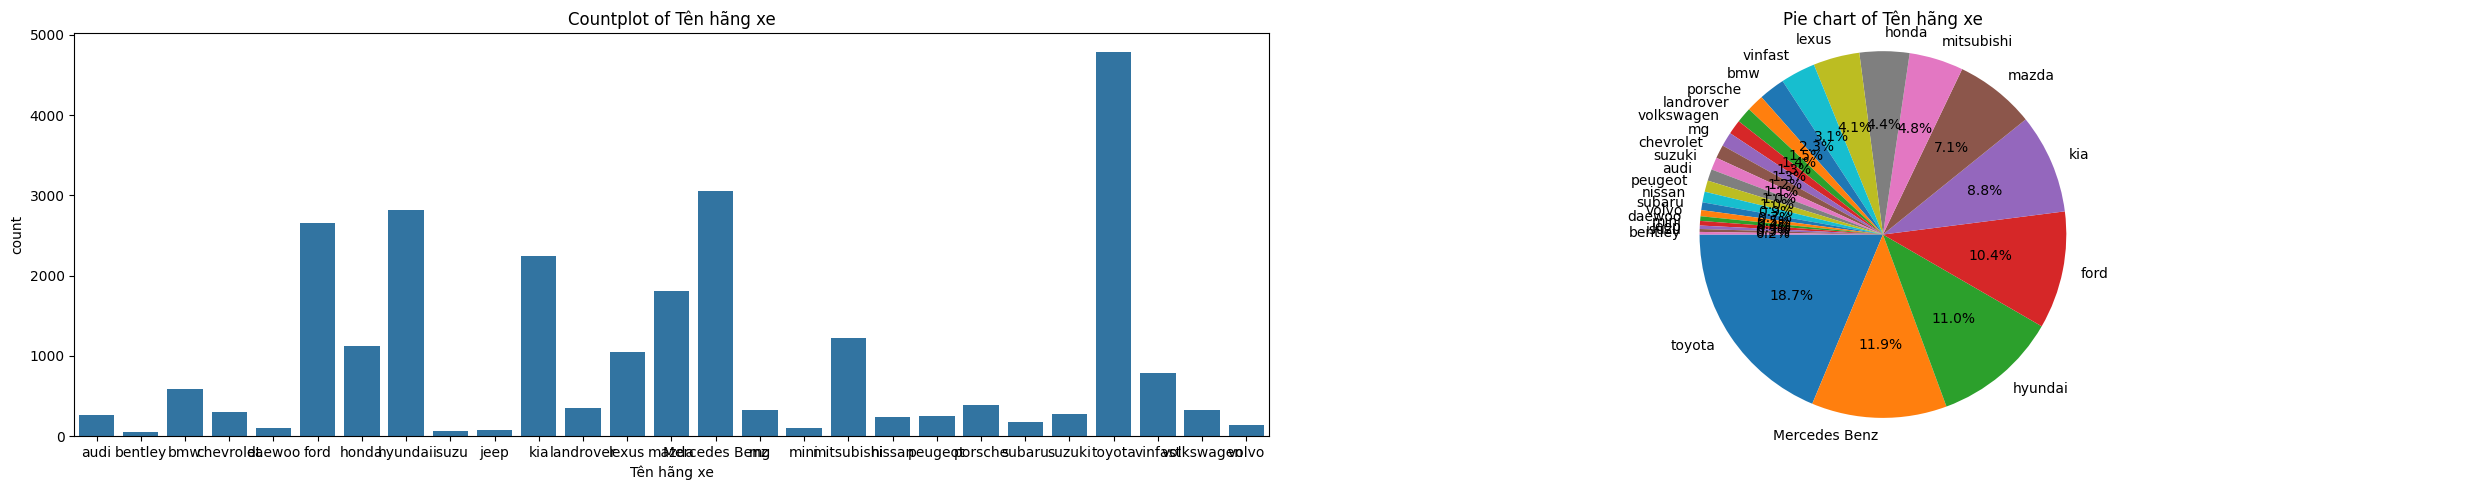

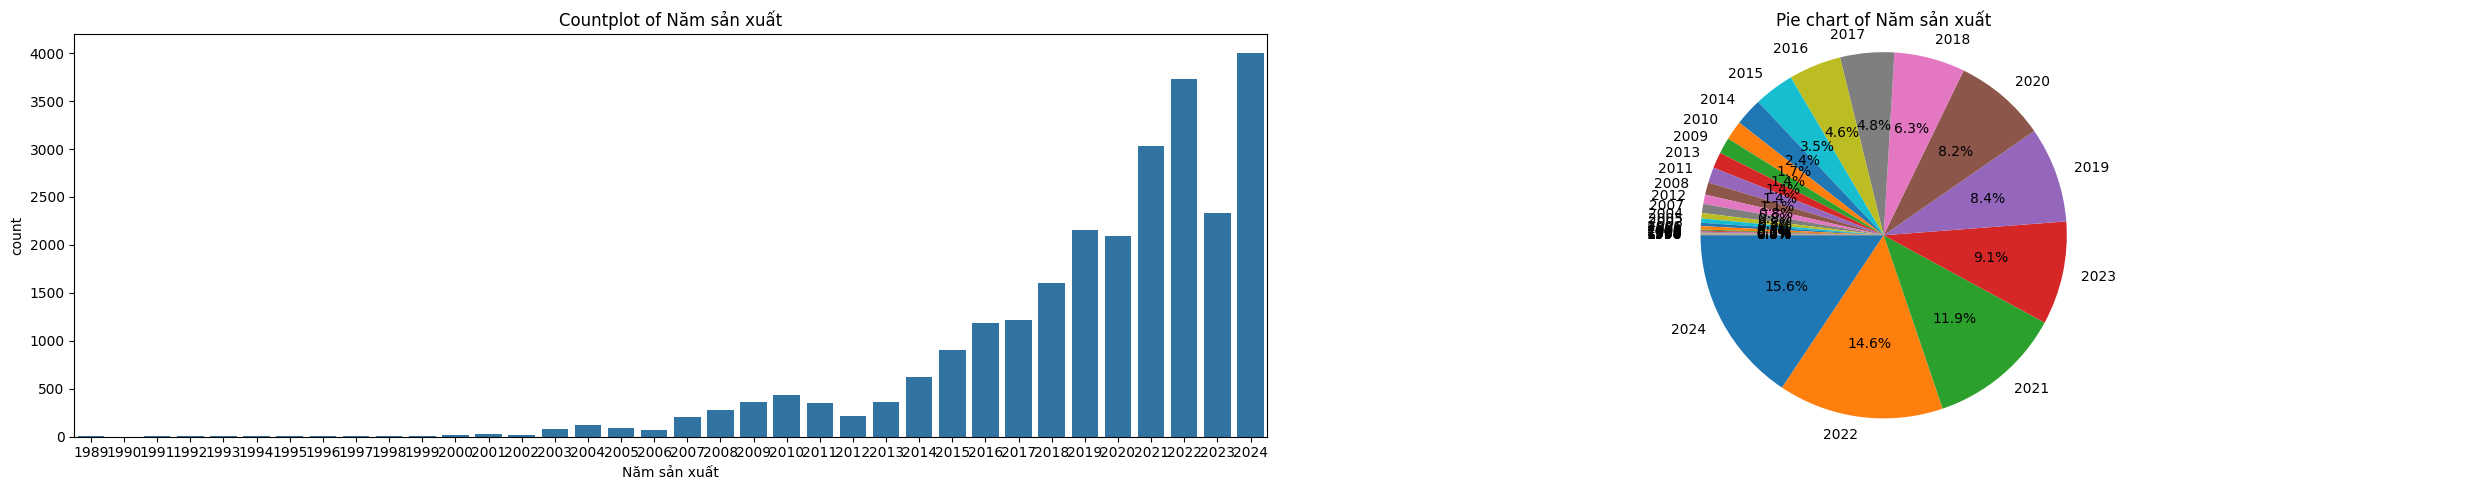

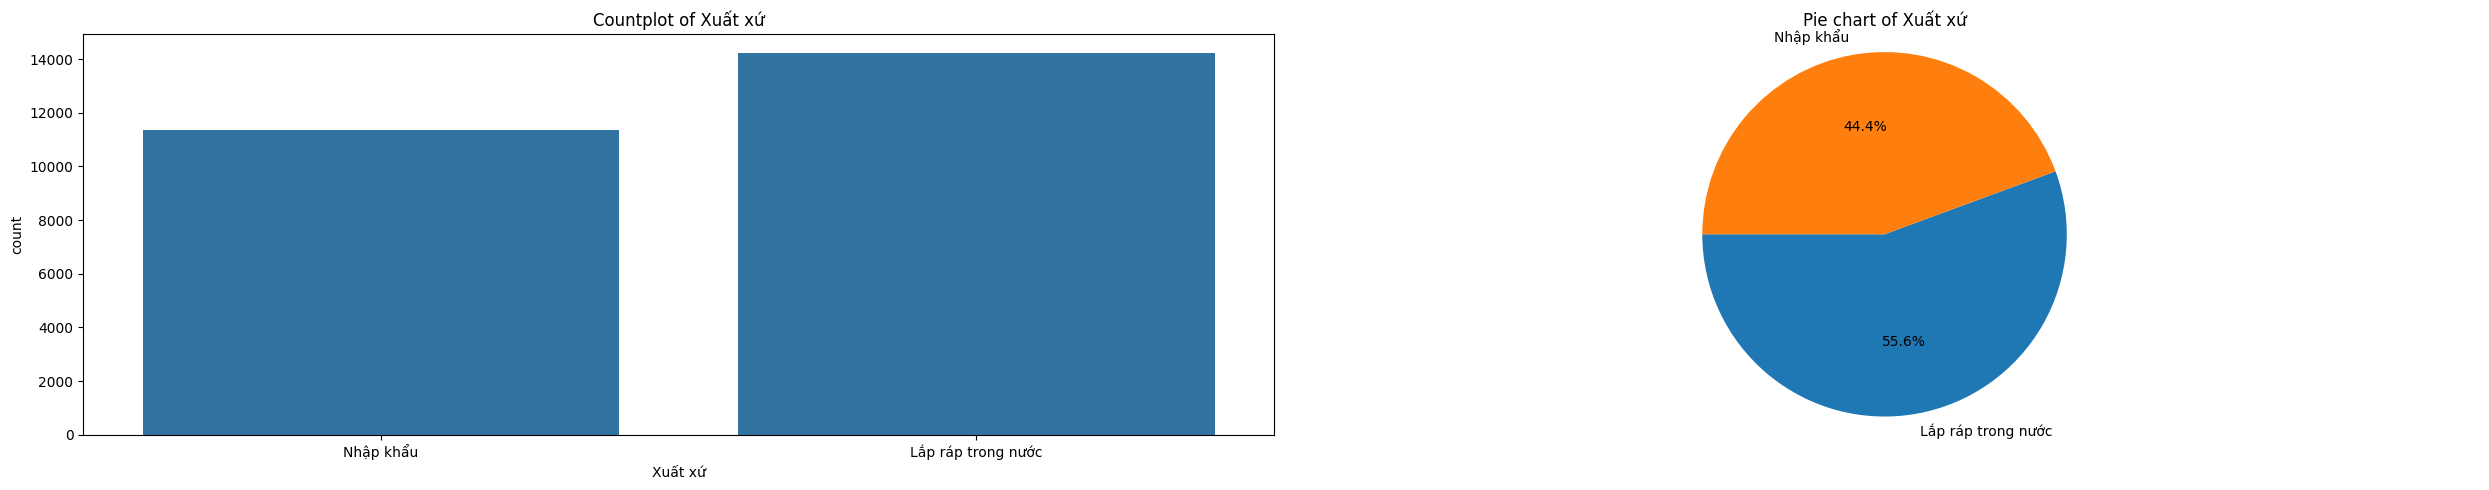

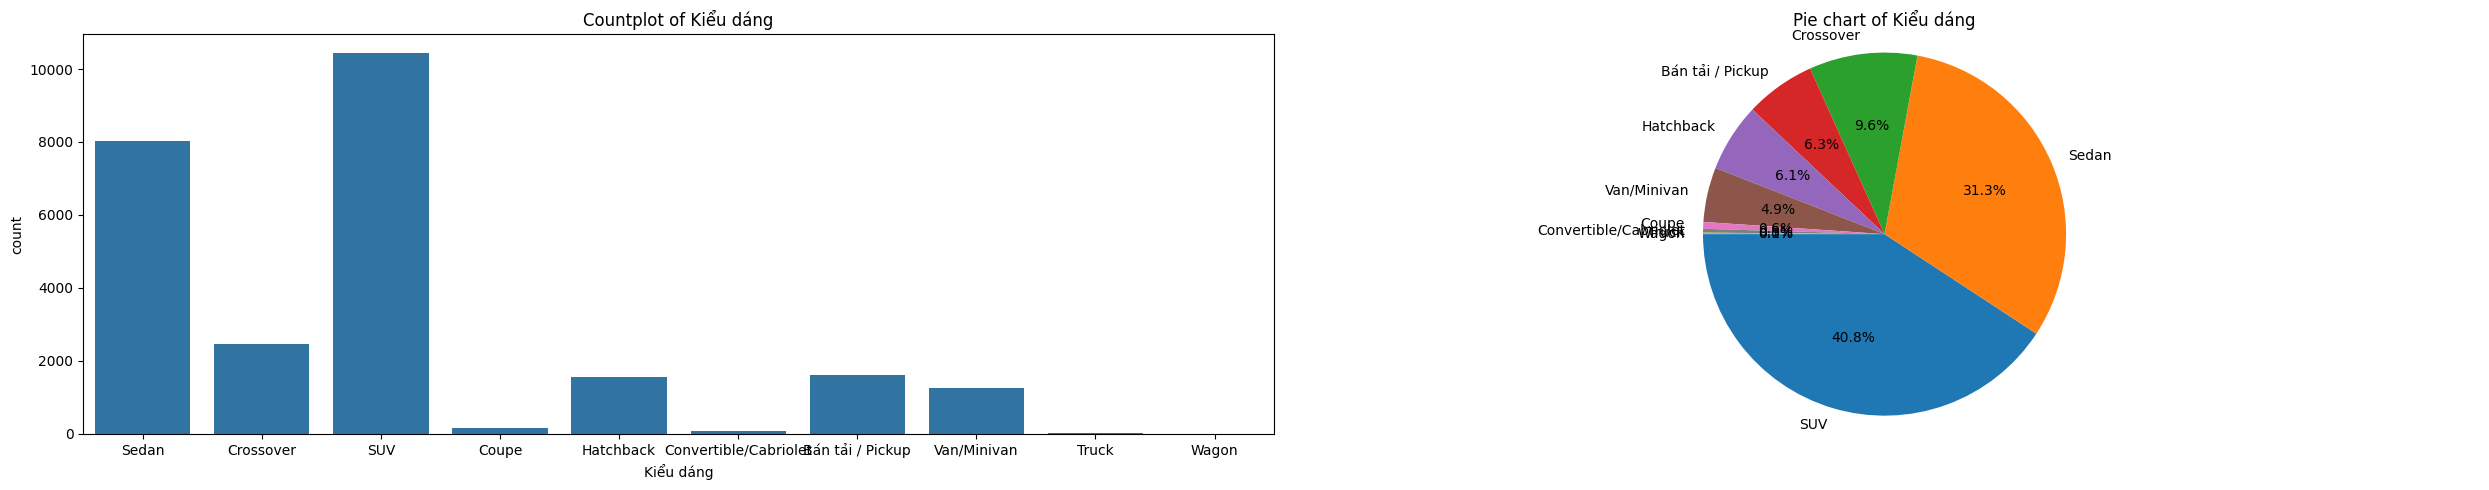

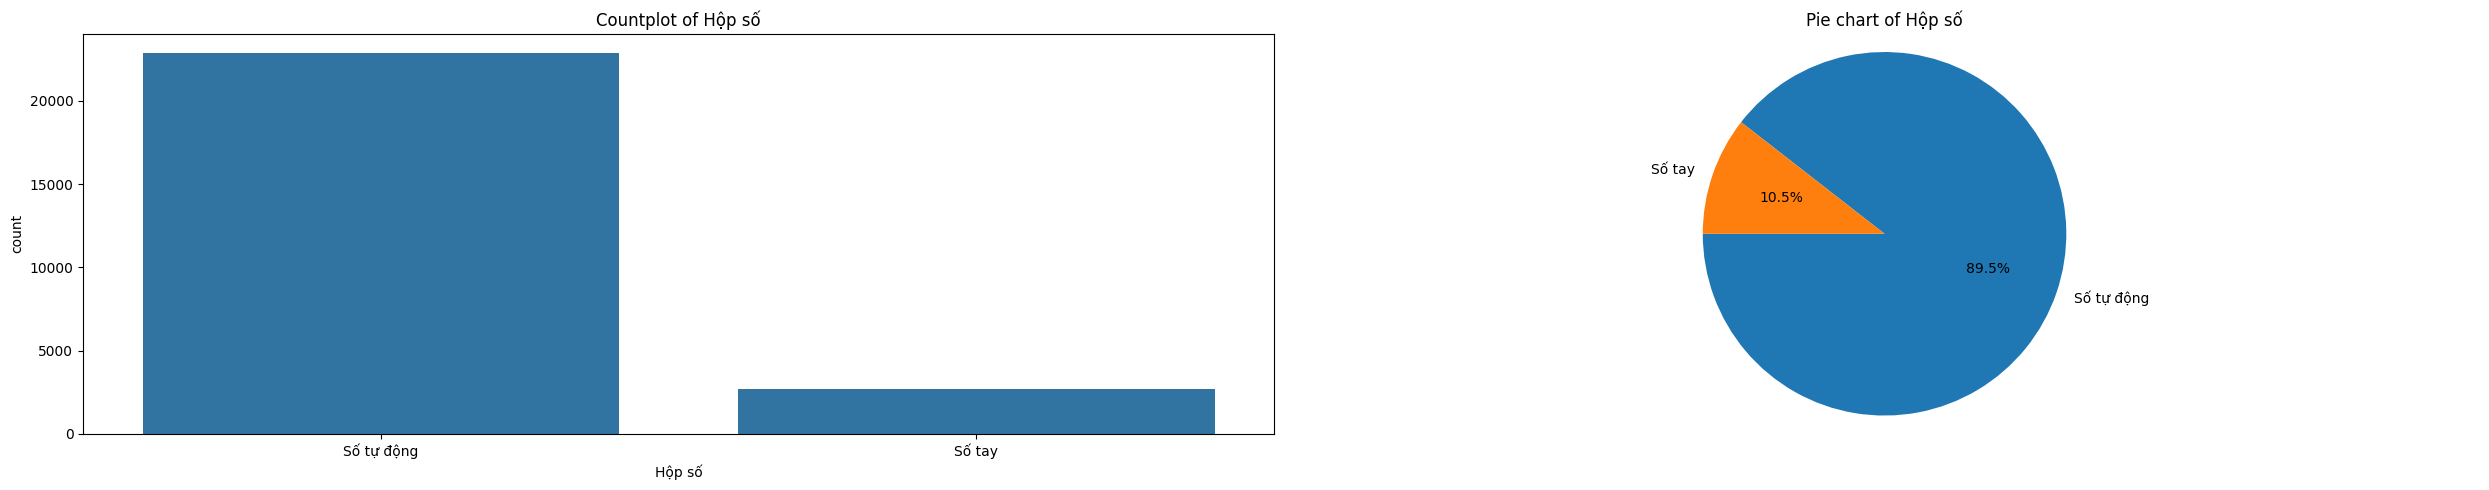

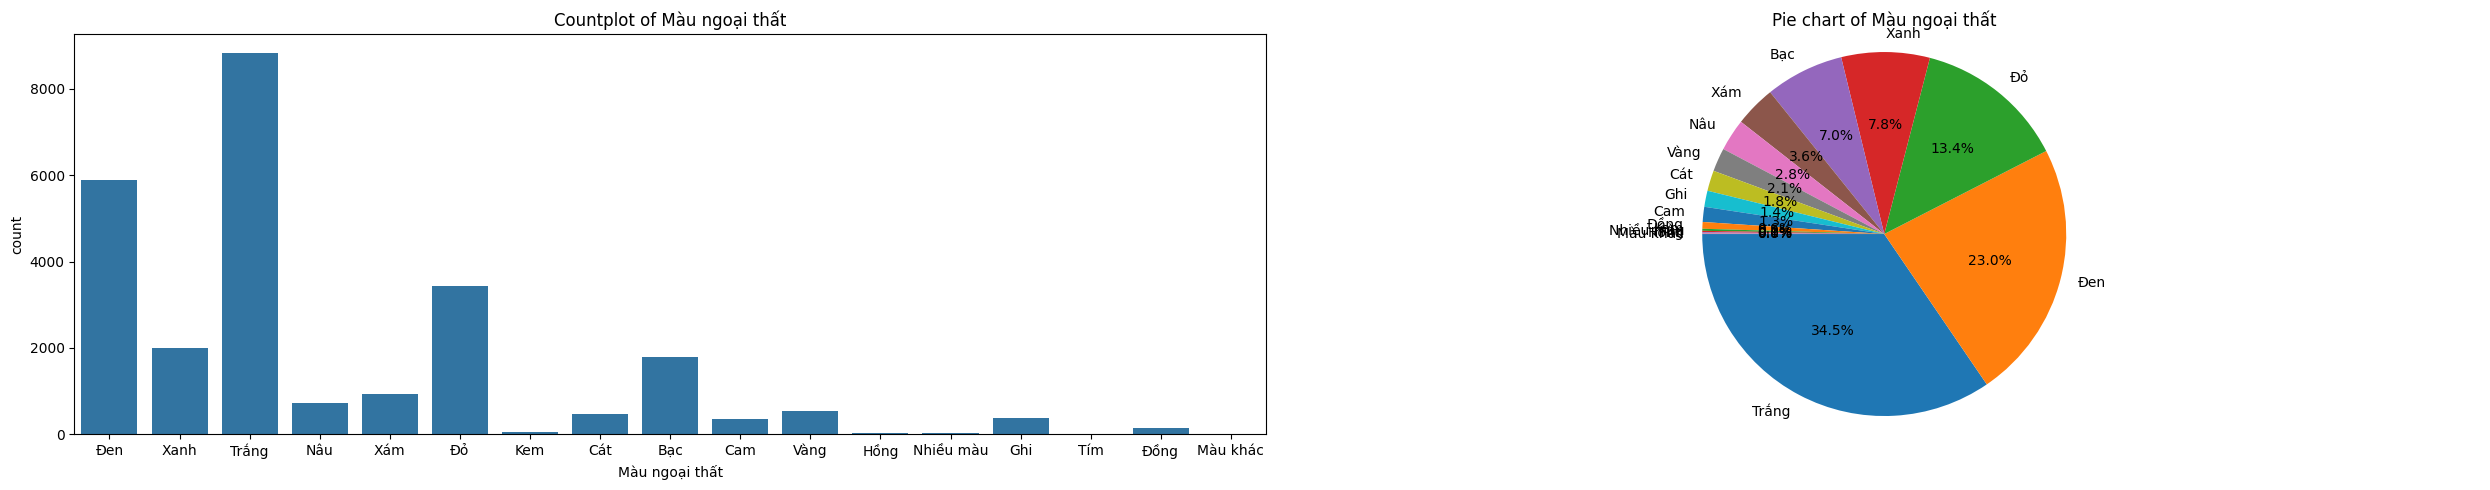

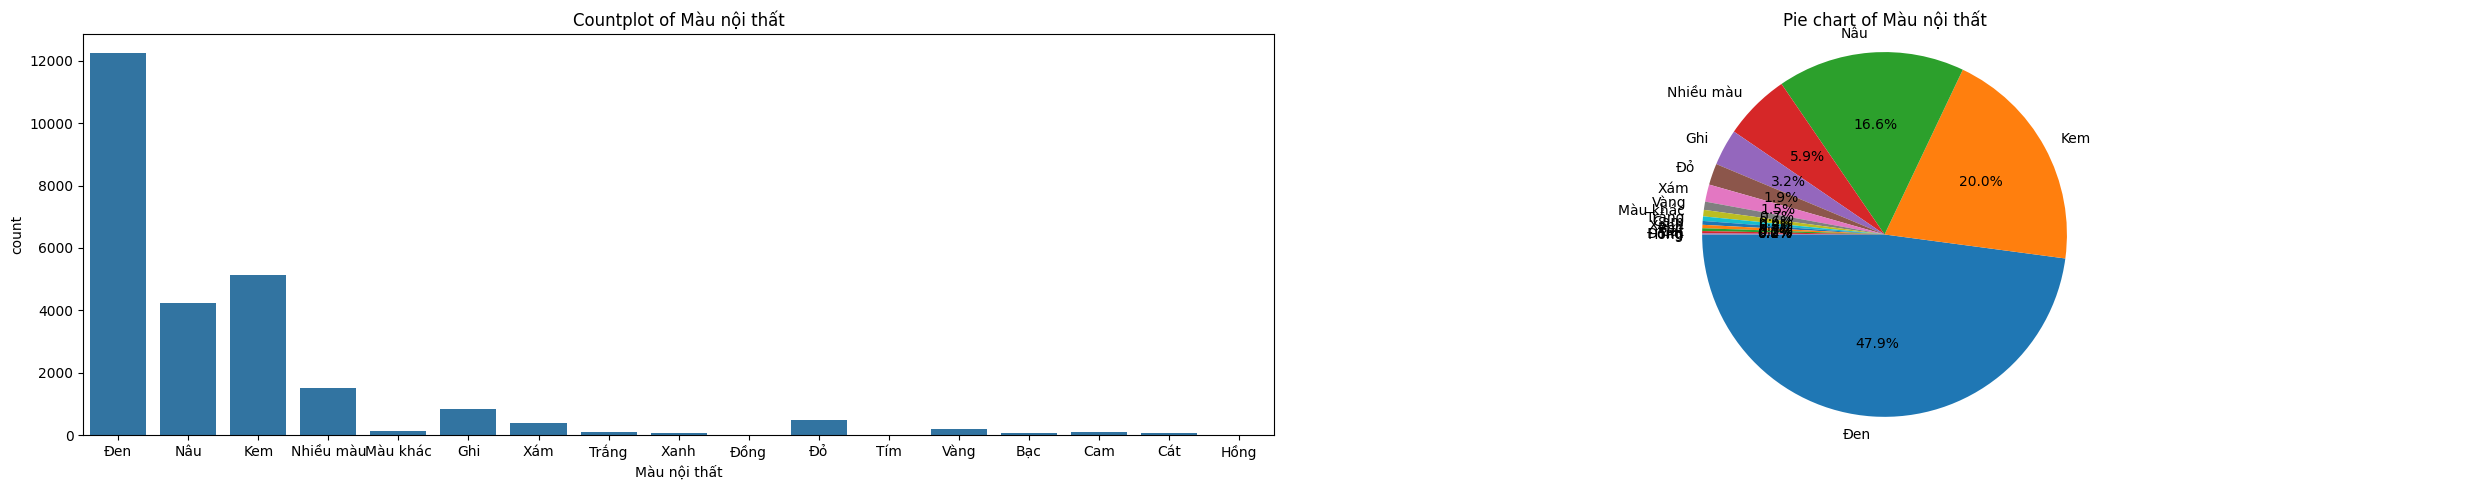

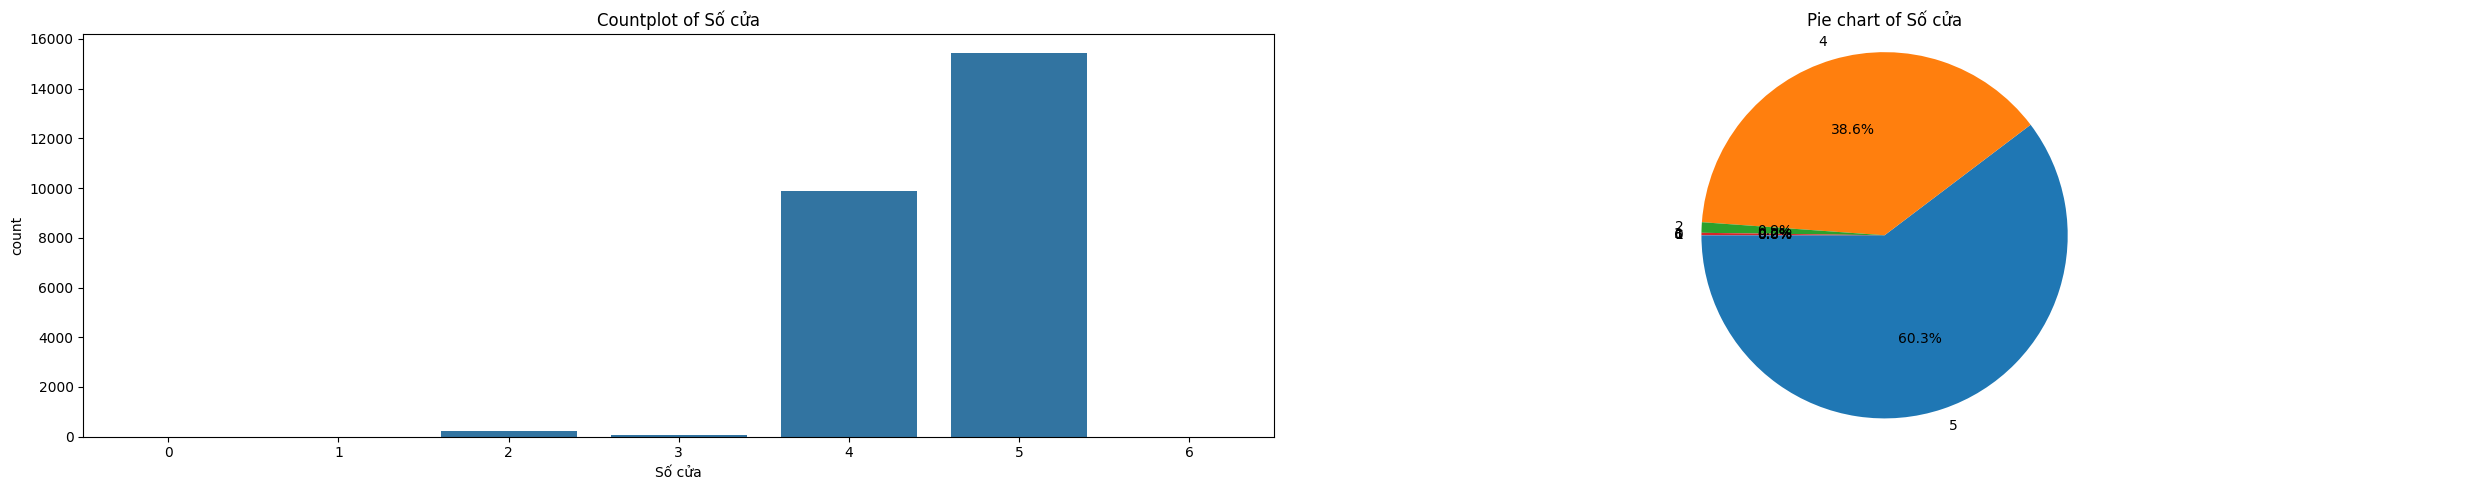

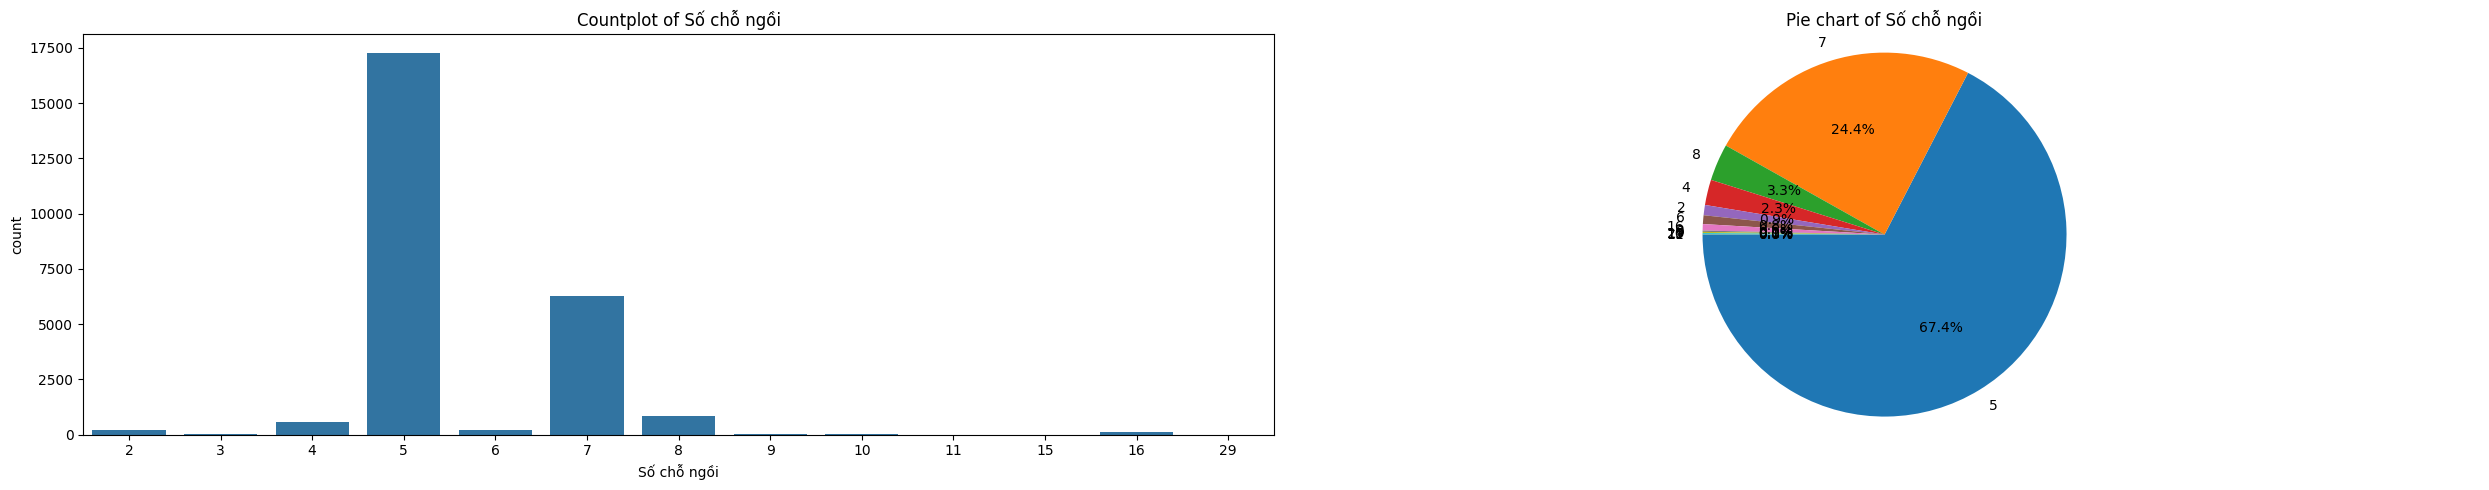

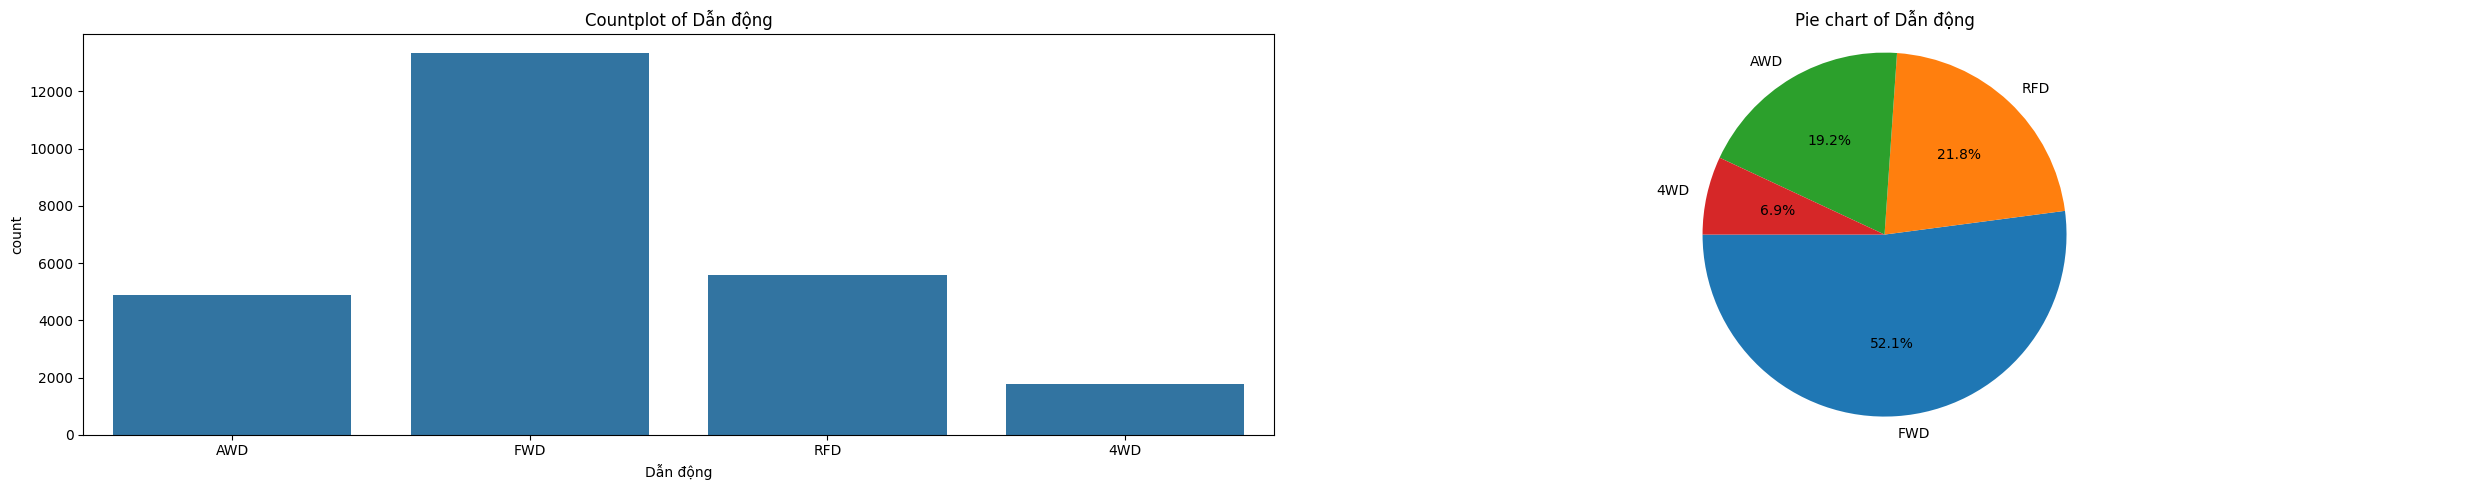

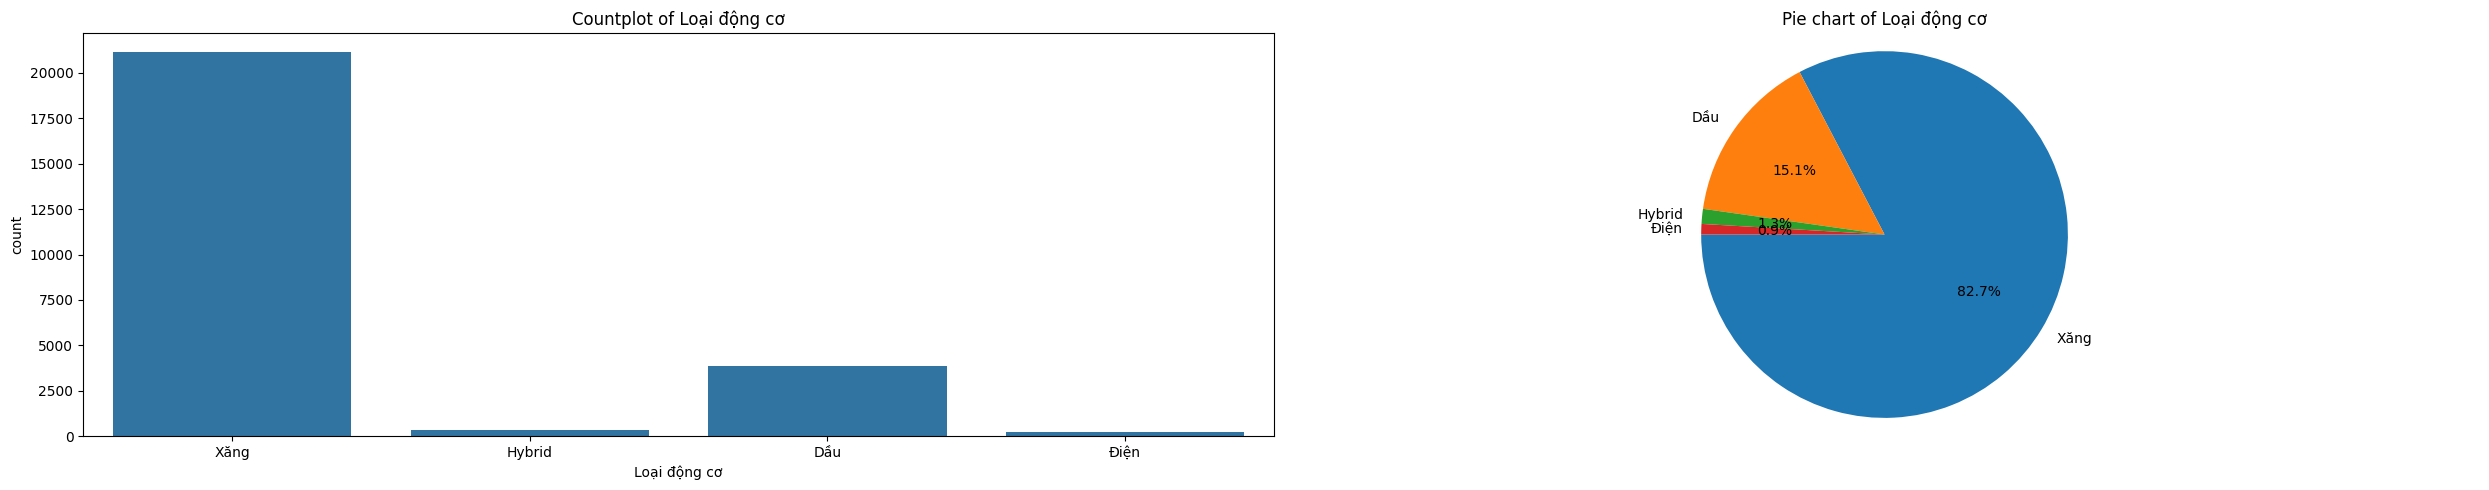

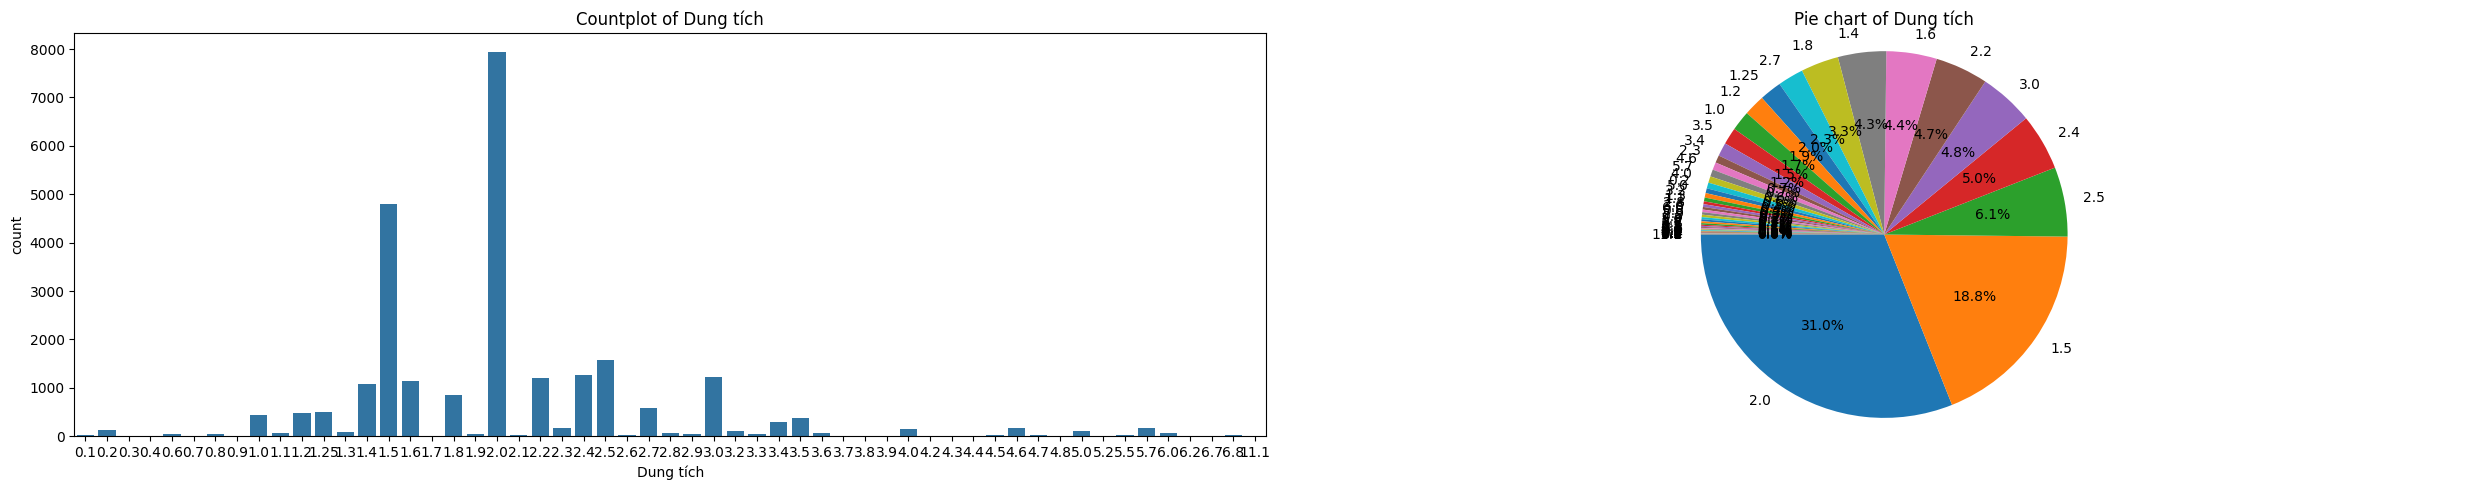

In [8]:
for column in ['Tên hãng xe', 'Năm sản xuất', 'Xuất xứ', 'Kiểu dáng','Hộp số','Màu ngoại thất', 'Màu nội thất', 'Số cửa', 'Số chỗ ngồi', 'Dẫn động', 'Loại động cơ', 'Dung tích']:
        # Tạo figure và axes cho countplot và pie chart
        fig, axs = plt.subplots(1, 2, figsize=(25, 5))

        # Vẽ countplot
        sns.countplot(x=column, data=df, ax=axs[0])
        axs[0].set_title(f'Countplot of {column}')

        # Đếm số lượng giá trị duy nhất trong cột và vẽ pie chart
        value_counts = df[column].value_counts()
        axs[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=180)
        axs[1].set_title(f'Pie chart of {column}')
        axs[1].axis('equal')  # Đảm bảo biểu đồ pie là hình tròn

        # Hiển thị biểu đồ
        plt.tight_layout()
        plt.show()

Bảng tần xuất các giá trị ở các cột còn lại

In [9]:
column = ["Tỉnh"]
element_count_df = df[column].value_counts().to_frame().reset_index()
element_count_df.columns = ['Tỉnh', 'Count']
print(f"Column '{column}':")
print(element_count_df)
print()

Column '['Tỉnh']':
     Tỉnh  Count
0  Hà Nội  14801
1  TP HCM   5518
2   other   5263



## Nhận Xét
- **Hà Nội và TP HCM** có số lượng xe đăng ký cao nhất, điều này phản ánh dân số đông và nhu cầu sử dụng xe cao tại hai thành phố lớn này.
- Các tỉnh như **Hải Phòng, Bình Dương, và Nghệ An** cũng có số lượng xe đáng kể, cho thấy nhu cầu vận tải và sử dụng xe cá nhân cao.
- Một số tỉnh có số lượng xe rất ít như **Vĩnh Long, Trà Vinh, Lai Châu, Cao Bằng, và Bạc Liêu**, điều này có thể do kinh tế kém phát triển hơn, dân số thấp hơn, hoặc các yếu tố văn hóa và địa lý khác ảnh hưởng.

## Kết Luận
Phân tích này cho thấy sự phân bố không đều của xe ô tô theo từng khu vực, gợi ý rằng các nhà lập kế hoạch đô thị và nhà phát triển cơ sở hạ tầng nên xem xét điều chỉnh các chính sách và dự án phát triển cho phù hợp với nhu cầu vận tải và sử dụng xe cá nhân ở mỗi khu vực.

## Checking distribution

#### Giá

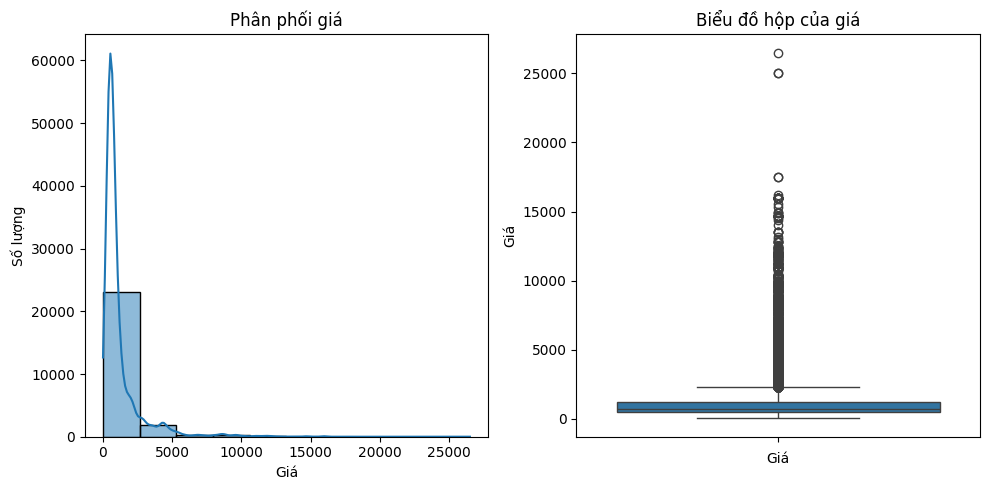

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Biểu đồ phân phối cho cột "Giá"
sns.histplot(df['Giá'], kde=True, bins=10, ax=axes[0])
axes[0].set_title("Phân phối giá")
axes[0].set_xlabel("Giá")
axes[0].set_ylabel("Số lượng")

# Biểu đồ hộp cho cột "Giá"
sns.boxplot(data=df, y='Giá', ax=axes[1])
axes[1].set_title("Biểu đồ hộp của giá")
axes[1].set_xlabel("Giá")

# Điều chỉnh bố cục
plt.tight_layout()

# Hiển thị các biểu đồ
plt.show()


* Phân bố giá có độ lệch dương
* Có một số ngoại lệ được quan sát thấy 

In [11]:
# Giảm độ lớn của giá
df['Giá']=np.log(df['Giá'])

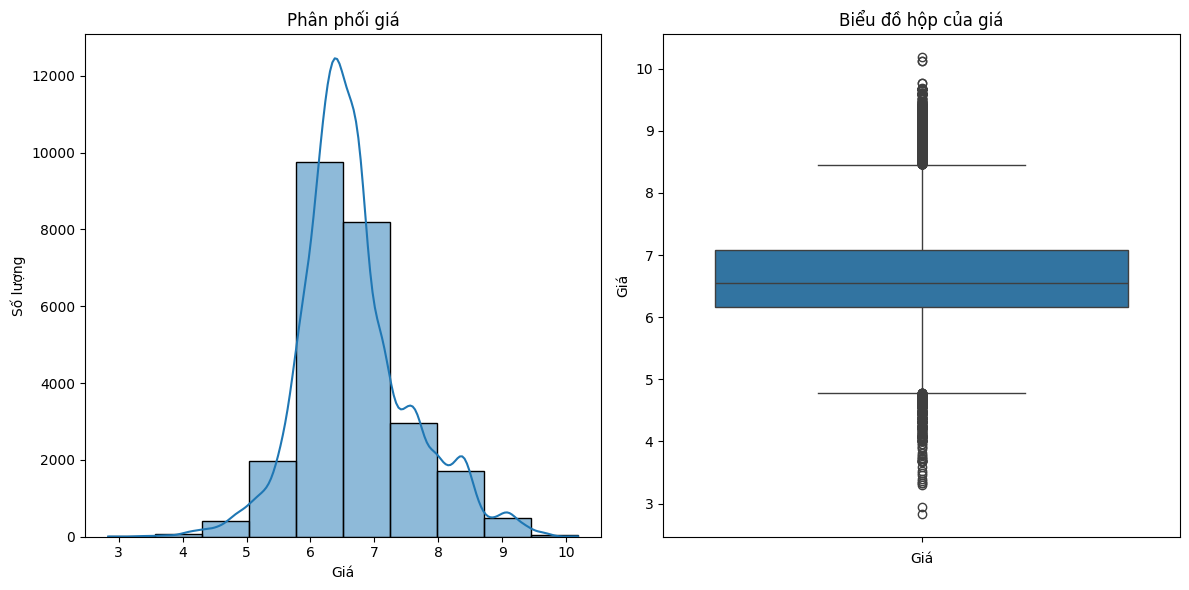

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Biểu đồ phân phối cho cột "Giá"
sns.histplot(df['Giá'], kde=True, bins=10, ax=axes[0])
axes[0].set_title("Phân phối giá")
axes[0].set_xlabel("Giá")
axes[0].set_ylabel("Số lượng")

# Biểu đồ hộp cho cột "Giá"
sns.boxplot(data=df, y='Giá', ax=axes[1])
axes[1].set_title("Biểu đồ hộp của giá")
axes[1].set_xlabel("Giá")

# Điều chỉnh bố cục
plt.tight_layout()

# Hiển thị các biểu đồ
plt.show()


* Phần lớn nằm trong khoảng từ 500 đến 700 triệu đồng, với một số ngoại lệ cao tới 800 và thấp tới 300 triệu đồng

In [13]:
# Chọn các cột có kiểu dữ liệu số
numeric_df = df.select_dtypes(include=['number'])

# Tính toán ma trận tương quan cho các cột số
numeric_df.corr().loc['Giá']

Năm sản xuất    0.470546
Số Km đã đi    -0.021678
Số chỗ ngồi     0.035355
Số cửa          0.115266
Dung tích       0.525127
Giá             1.000000
Name: Giá, dtype: float64

# Phân tích Tương Quan Pearson

Phân tích tương quan Pearson giữa giá xe và các thuộc tính khác trong bộ dữ liệu xe ô tô cho thấy các điểm sau:

- **Năm sản xuất**: Tương quan là 0.470546, cho thấy một mối tương quan dương khá mạnh, có nghĩa là giá xe có xu hướng tăng khi năm sản xuất gần đây hơn.
- **Số km đã đi**: Tương quan là -0.021678, chỉ ra rằng không có mối liên hệ rõ ràng giữa số km đã đi và giá xe.
- **Số chỗ ngồi**: Tương quan là 0.035355, cho thấy rất ít hoặc không có mối quan hệ giữa số chỗ ngồi và giá xe.
- **Số cửa**: Tương quan là 0.112566, cho thấy một mối tương quan dương nhẹ, nhưng không đáng kể, giữa số cửa và giá xe.
- **Dung tích**: Tương quan là 0.525127, chỉ ra một mối tương quan dương mạnh, nghĩa là xe có dung tích lớn hơn thường có giá cao hơn.
- **Giá**: Tương quan là 1.000000, điều này tự nhiên vì đây là tương quan của giá với chính nó.

## Kết Luận
Phân tích tương quan cho thấy rằng "Năm sản xuất" và "Dung tích" có tương quan dương mạnh với giá xe, có thể là những yếu tố quan trọng để xem xét trong mô hình dự đoán giá xe. Trong khi đó, các thuộc tính như "Số km đã đi", "Số chỗ ngồi", và "Số cửa" có rất ít hoặc không có mối tương quan đáng kể với giá xe, cho thấy chúng có thể ít ảnh hưởng đến giá xe so với các yếu tố khác.


In [14]:
# Tương quan
numeric_df.corr()

,Năm sản xuất,Số Km đã đi,Số chỗ ngồi,Số cửa,Dung tích,Giá
Năm sản xuất,1.000000,-0.020696,0.004766,0.101617,-0.228591,0.470546
Số Km đã đi,-0.020696,1.000000,-0.002573,0.003735,-0.007702,-0.021678
Số chỗ ngồi,0.004766,-0.002573,1.000000,0.327240,0.163895,0.035355
Số cửa,0.101617,0.003735,0.327240,1.000000,0.036517,0.115266
Dung tích,-0.228591,-0.007702,0.163895,0.036517,1.000000,0.525127
Giá,0.470546,-0.021678,0.035355,0.115266,0.525127,1.000000


# Phân tích Ma Trận Tương Quan

Dưới đây là các điểm chính từ ma trận tương quan giữa các thuộc tính:

- **Năm sản xuất và Giá**: Tương quan dương mạnh 0.470546, cho thấy giá xe có xu hướng tăng khi năm sản xuất gần đây hơn.
- **Dung tích và Giá**: Tương quan dương mạnh 0.525127, xe có dung tích lớn hơn thường có giá cao hơn.
- **Số cửa và Số chỗ ngồi**: Tương quan dương khá mạnh 0.327240, cho thấy số cửa thường nhiều hơn ở những xe có nhiều chỗ ngồi hơn.
- **Số cửa và Giá**: Tương quan dương nhẹ 0.115266, mặc dù không rõ ràng, cho thấy có thể số cửa ít ảnh hưởng đến giá xe.
- **Năm sản xuất và Dung tích**: Tương quan âm -0.228591, có thể xe cũ hơn có dung tích lớn hơn.
- **Số km đã đi và các thuộc tính khác**: Hầu như không có tương quan đáng kể với các thuộc tính khác, bao gồm giá.

## Kết Luận

Phân tích tương quan cho thấy các yếu tố quan trọng nhất ảnh hưởng đến giá xe là "Năm sản xuất" và "Dung tích". Các thuộc tính khác như "Số km đã đi", "Số chỗ ngồi", và "Số cửa" có rất ít hoặc không có tương quan đáng kể với giá xe. Điều này cung cấp một cái nhìn sâu sắc vào các yếu tố cần tập trung khi xây dựng mô hình dự đoán giá xe. Mô hình học máy có thể cần tập trung vào các biến có mối tương quan mạnh với giá để cải thiện độ chính xác.


Biểu đồ heatmap giữa các cột số và cột giá


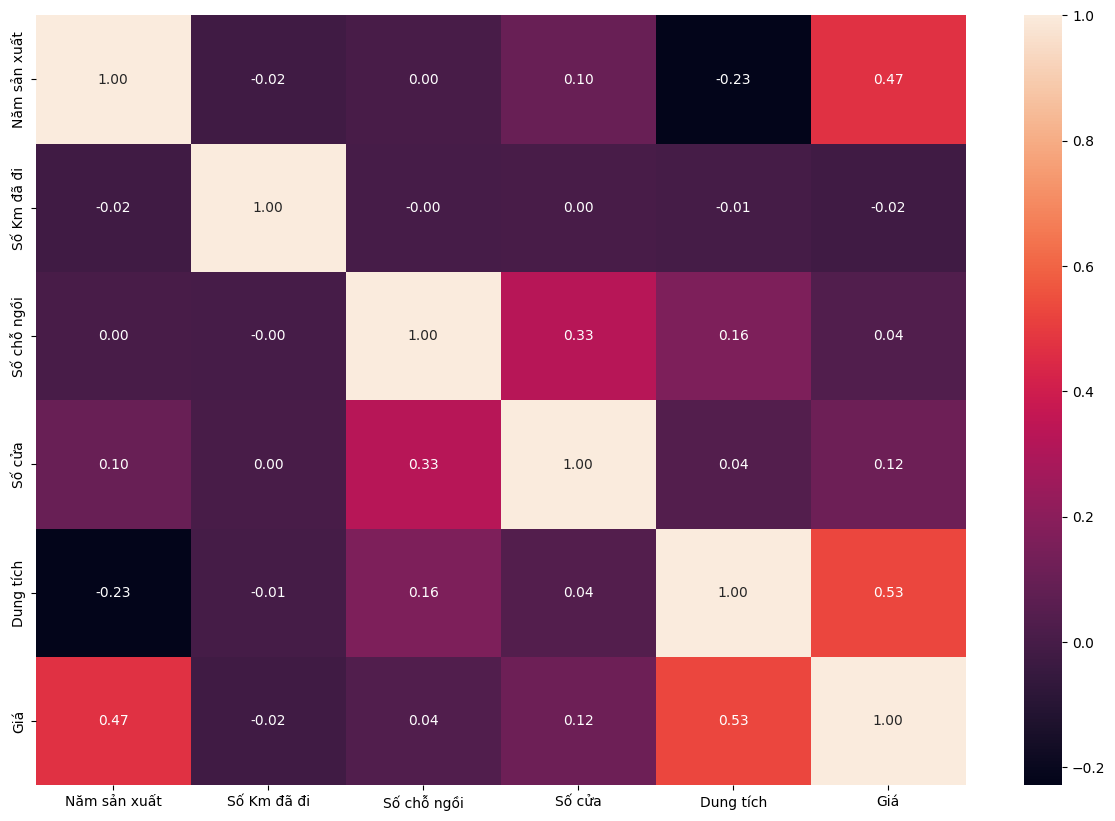

In [15]:
plt.figure(figsize=(15, 10))

# Tạo heatmap của ma trận tương quan
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f')

# Hiển thị biểu đồ
plt.show()


* Mối liên hệ mạnh nhất là giữa "Dung tích" và "Giá", với hệ số tương quan là 0.53, cho thấy dung tích càng lớn thì giá xe càng cao.
* "Dung tích" và "Số chỗ ngồi" cũng có mối tương quan tích cực (0.33), có thể liên quan đến việc các xe lớn hơn thường có nhiều chỗ ngồi hơn.
* "Năm sản xuất" và "Giá" có mối quan hệ ngược (hệ số -0.23), cho thấy xe càng mới thì giá càng cao.

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


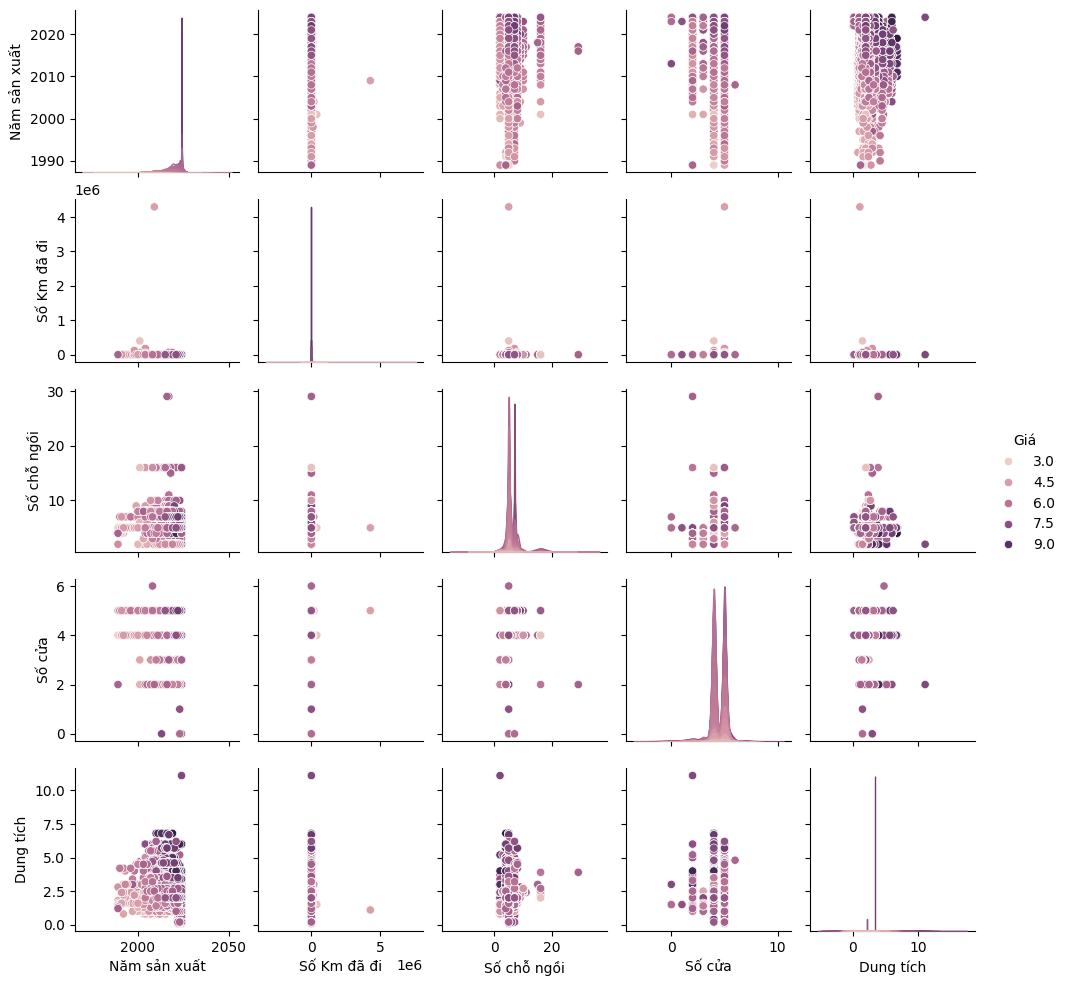

In [16]:
# Pairplot (Numerical columns)
dat = numeric_df

sns.pairplot(dat, hue='Giá', size = 2)

## Phân tích uni_variate cho các cột số

### Độ lệch

In [17]:
numeric_df.skew()

Năm sản xuất     -1.625311
Số Km đã đi     157.006280
Số chỗ ngồi       3.316977
Số cửa           -1.254099
Dung tích         2.031580
Giá               0.558711
dtype: float64

# Phân tích Độ Lệch Các Cột Số

Phân tích độ lệch (skewness) cho các cột số trong bộ dữ liệu xe ô tô cho thấy các điểm sau:

- **Năm sản xuất**: Độ lệch là -1.625311, chỉ ra rằng dữ liệu bị lệch về phía trước, tức là có nhiều xe sản xuất gần đây hơn.
- **Số km đã đi**: Độ lệch rất cao là 157.062280, cho thấy rằng phân phối của số km đã đi rất lệch về phía một giá trị cực kỳ cao so với phần lớn các giá trị khác.
- **Số chỗ ngồi**: Độ lệch là 3.316977, dữ liệu lệch nhiều về phía giá trị cao, có thể có những chiếc xe với số lượng chỗ ngồi rất lớn không phổ biến.
- **Số cửa**: Độ lệch là -1.254099, cho thấy dữ liệu nghiêng về phía giá trị thấp hơn, có thể là số cửa ít hơn là phổ biến hơn.
- **Dung tích**: Độ lệch là 2.031580, dữ liệu lệch nhiều về phía giá trị cao, có thể do có một số xe với dung tích rất cao so với mặt bằng chung.
- **Giá**: Độ lệch là 0.558711, cho thấy phân phối của giá xe tương đối cân bằng hơn so với các thuộc tính khác nhưng vẫn hơi nghiêng về phía giá trị cao.

## Kết Luận
Độ lệch cao ở một số cột như "Số km đã đi" và "Số chỗ ngồi" cho thấy sự không đồng đều trong phân phối của các biến này, điều này có thể ảnh hưởng đến các mô hình học máy sử dụng dữ liệu này và cần được xử lý thận trọng, có thể thông qua biện pháp chuẩn hóa hoặc biến đổi dữ liệu.


### Độ nhọn

In [18]:
numeric_df.kurt()

Năm sản xuất        3.491904
Số Km đã đi     24928.536966
Số chỗ ngồi        26.321610
Số cửa              2.826696
Dung tích           7.497405
Giá                 0.974619
dtype: float64

Phân tích độ nhọn (kurtosis) cho các cột số trong bộ dữ liệu xe ô tô cho thấy các điểm sau:

- **Năm sản xuất**: Độ nhọn là 3.491904, cho thấy phân phối có đỉnh nhọn hơn so với phân phối chuẩn.
- **Số km đã đi**: Độ nhọn rất cao là 24928.536966, biểu thị một phân phối có rất nhiều giá trị cực trị, đặc biệt là giá trị rất cao, rất lớn so với phần lớn các giá trị khác.
- **Số chỗ ngồi**: Độ nhọn là 26.321610, cũng chỉ ra rằng phân phối này có đỉnh rất nhọn và nhiều giá trị cực trị.
- **Số cửa**: Độ nhọn là 2.826696, phân phối này cũng có đỉnh nhọn hơn so với phân phối chuẩn.
- **Dung tích**: Độ nhọn là 7.494705, cho thấy rằng phân phối này có đỉnh nhọn và nhiều giá trị cực trị hơn so với một phân phối chuẩn.
- **Giá**: Độ nhọn là 0.974619, cho thấy phân phối của giá xe gần với phân phối chuẩn hơn các thuộc tính khác.

## Kết Luận
Các thuộc tính như "Số km đã đi" và "Số chỗ ngồi" có độ nhọn rất cao, điều này có thể gây khó khăn khi phân tích và mô hình hóa do những giá trị cực trị. Các phân tích này cho thấy cần cẩn thận khi xử lý các giá trị ngoại lệ và cân nhắc việc áp dụng các kỹ thuật chuẩn hóa hoặc biến đổi dữ liệu để giảm bớt sự ảnh hưởng của chúng đến các mô hình học máy.


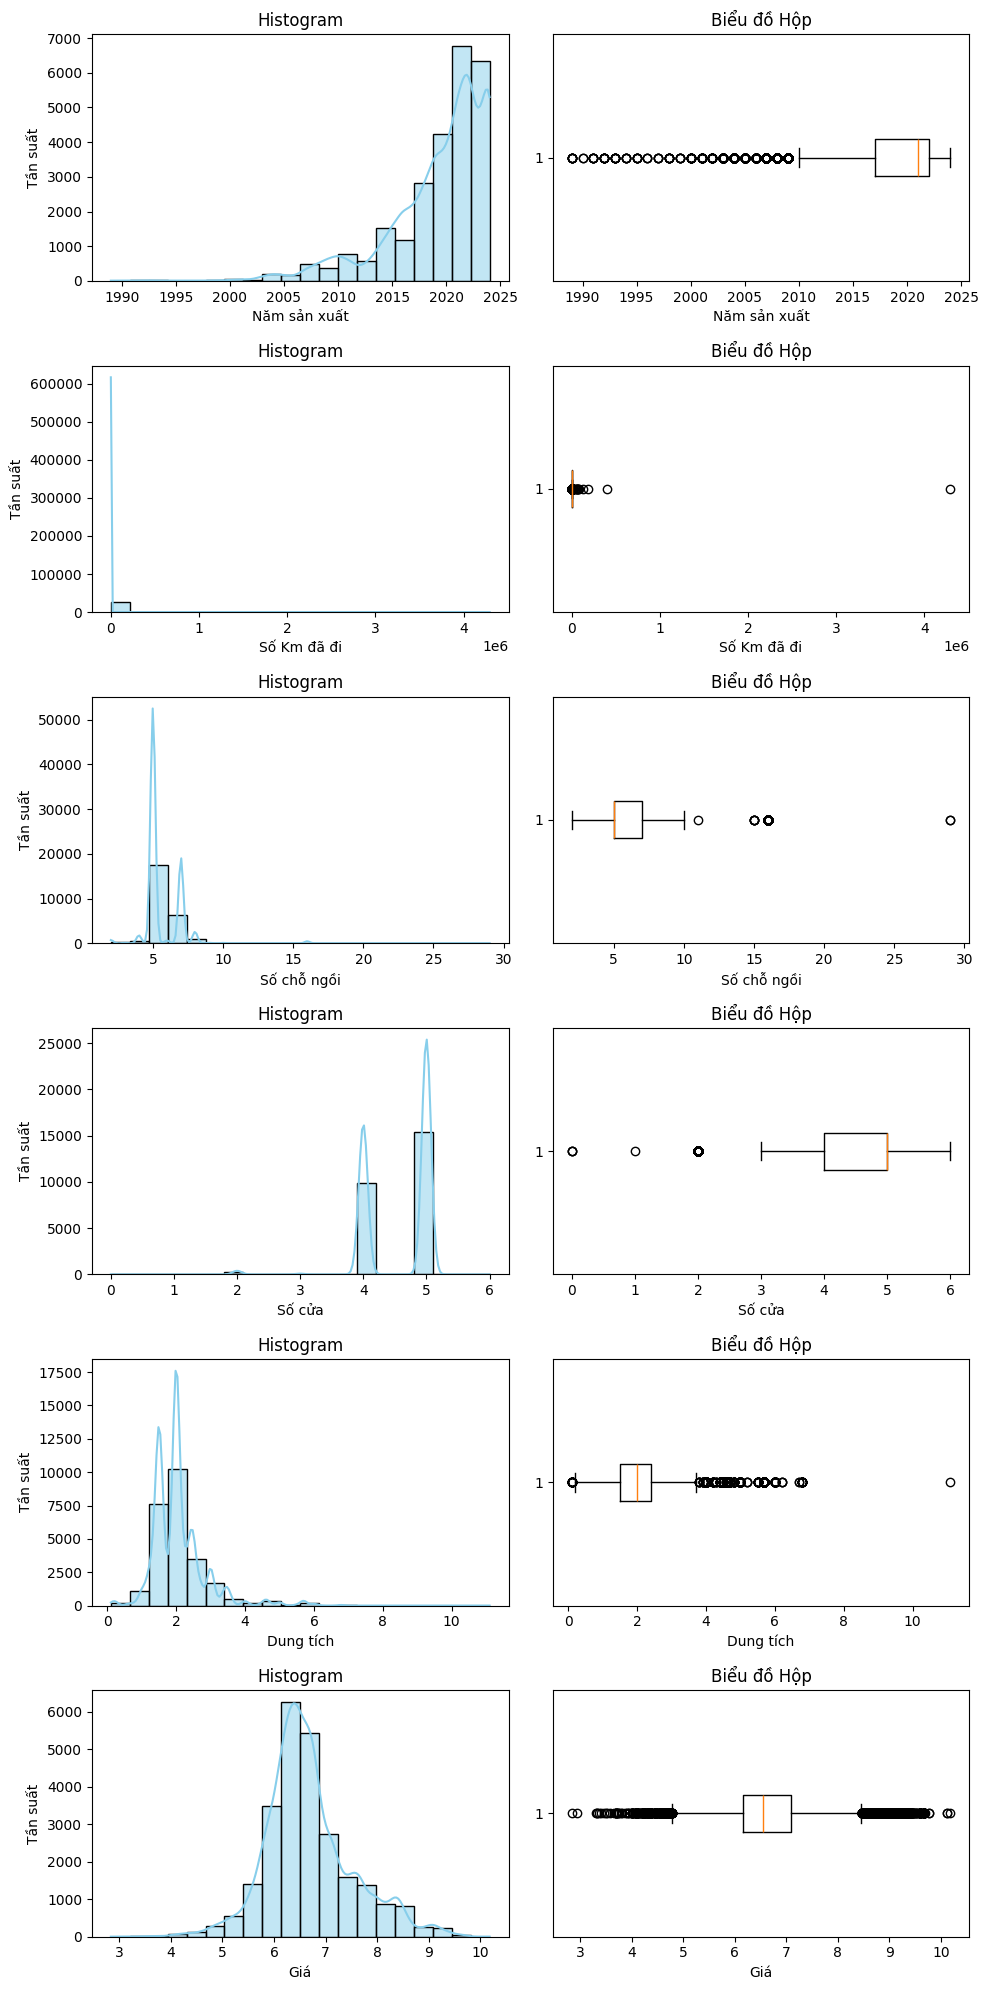

In [19]:
# Lựa chọn các cột số
cột_số = df.select_dtypes(include=[np.number]).columns

# Tạo subplot cho các histogram
fig, axes = plt.subplots(nrows=len(cột_số), ncols=2, figsize=(10, 20))
fig.subplots_adjust(hspace=0.5)

# Tạo histogram và box plot
for i, cột in enumerate(cột_số):
    # Histogram
    sns.histplot(data=df, x=cột, bins=20, color='skyblue', kde=True, ax=axes[i,0])
    axes[i, 0].set_xlabel(cột)
    axes[i, 0].set_ylabel('Tần suất')
    axes[i, 0].set_title('Histogram')

    # Box plot
    axes[i, 1].boxplot(df[cột], vert=False)
    axes[i, 1].set_xlabel(cột)
    axes[i, 1].set_title('Biểu đồ Hộp')

# Hiển thị các biểu đồ
plt.tight_layout()
plt.show()


### Năm sản xuất
- Đa số xe có năm sản xuất từ 2010 đến 2020, với một số ngoại lệ cũ hơn.

### Số km đã đi
- Hầu hết các xe có số km đã đi dưới 50,000 km, với một số ngoại lệ cao hơn.

### Số chỗ ngồi
- Phần lớn xe có 5 chỗ ngồi, với vài ngoại lệ có 7 hoặc 2 chỗ.

### Dung tích
- Các xe phổ biến nhất có dung tích từ 1.0 đến 2.0 lít, với một số ít xe có dung tích lớn hơn.

### Giá
- Giá xe phần lớn nằm trong khoảng từ 300 đến 700 triệu đồng, với một số ngoại lệ cao hơn.

## Phân tích uni_variate cho các cột phân loại

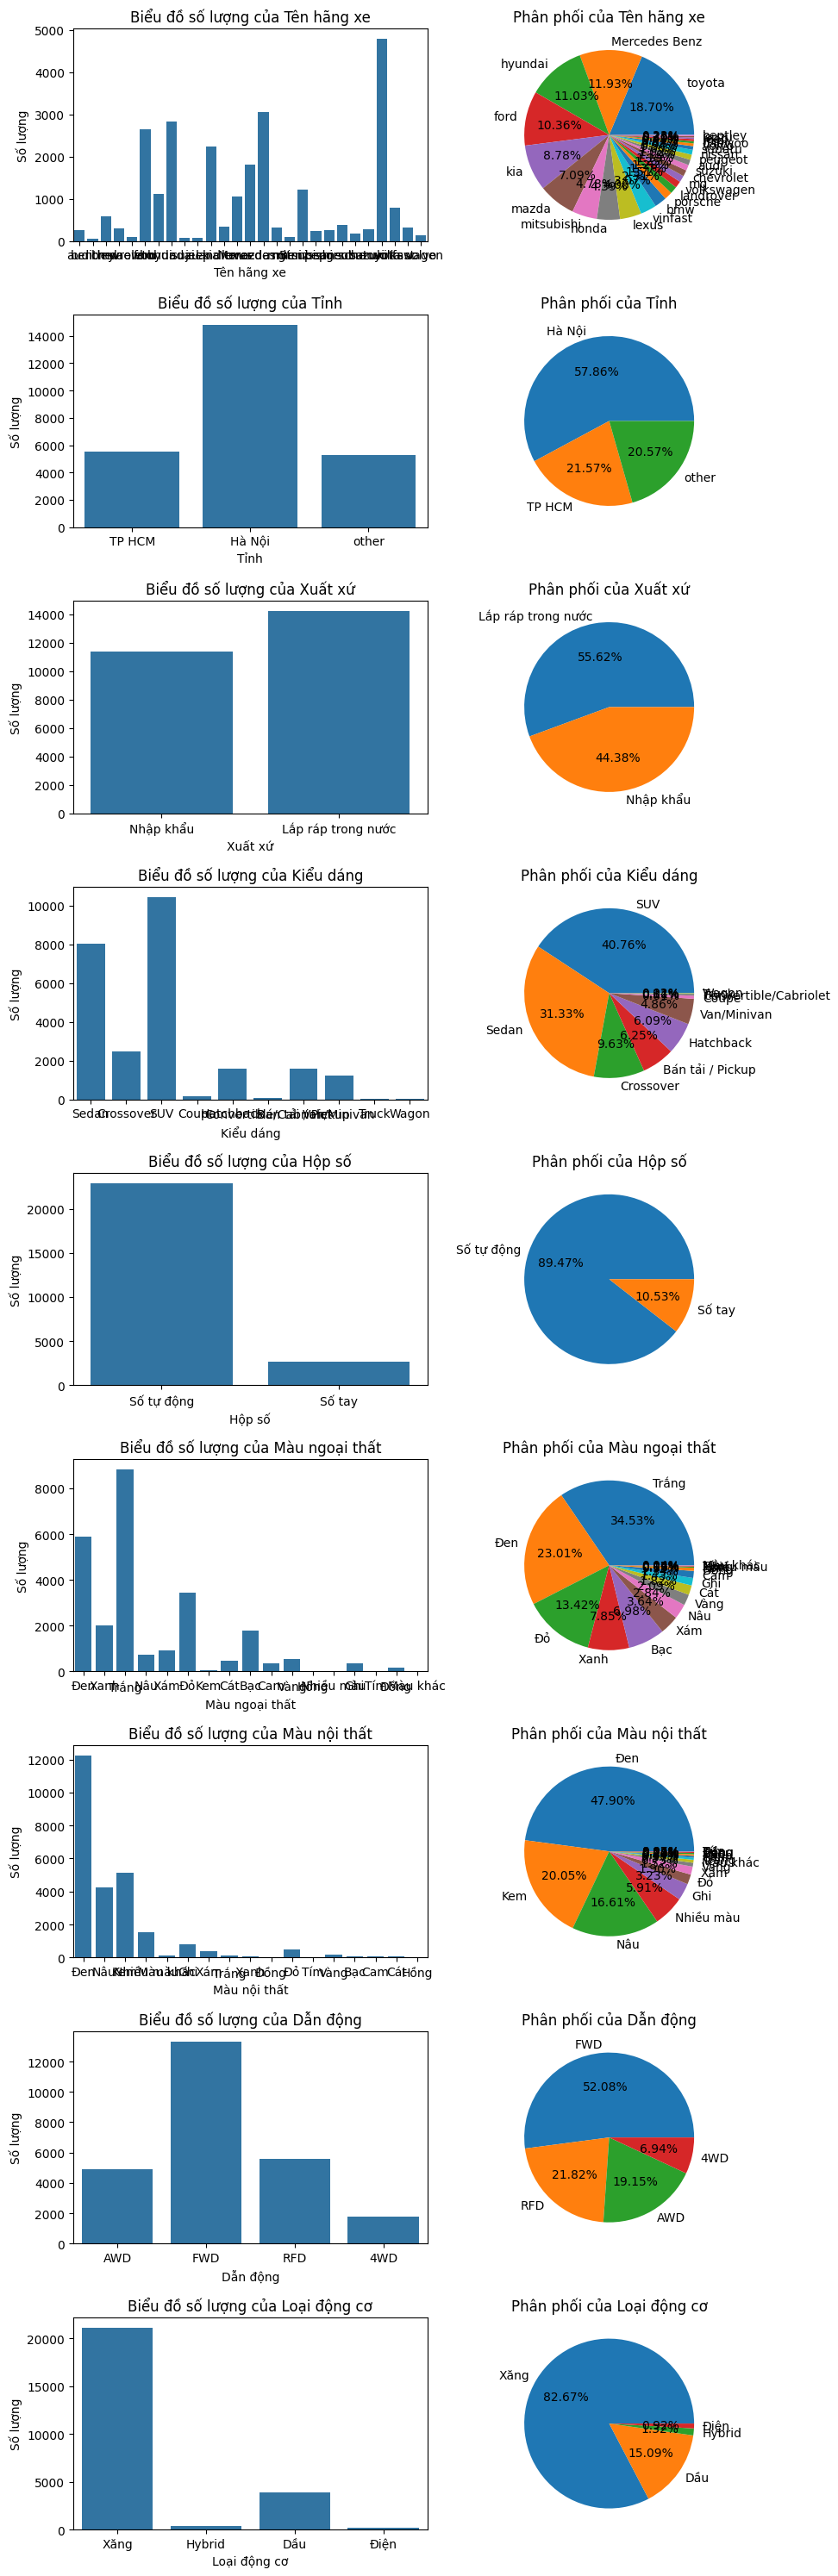

In [20]:
cat = []
for cột in df.columns:
    if df[cột].dtype == object:
        cat.append(cột)

fig, axes = plt.subplots(nrows=len(cat), ncols=2, figsize=(10, 30))

for i, cột in enumerate(cat):
    # Vẽ biểu đồ countplot (histogram) trong cột đầu tiên của hàng hiện tại
    sns.countplot(x=cột, data=df, ax=axes[i, 0])
    axes[i, 0].set_xlabel(cột)
    axes[i, 0].set_ylabel('Số lượng')
    axes[i, 0].set_title('Biểu đồ số lượng của ' + cột)

    # Vẽ biểu đồ pie trong cột thứ hai của hàng hiện tại sử dụng plot của Pandas
    df[cột].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[i, 1])
    axes[i, 1].set_title('Phân phối của ' + cột)
    axes[i, 1].set_ylabel('')

# Điều chỉnh bố cục để tránh chồng chéo
plt.tight_layout()

# Hiển thị các subplot
plt.show()



### Tên hãng xe
- Toyota và Ford là hai hãng xe dẫn đầu về số lượng, với Toyota chiếm ưu thế rõ rệt.

### Tỉnh đăng ký
- Hà Nội và TP.HCM là hai thành phố có số lượng xe đăng ký cao nhất, trong đó Hà Nội chiếm tỷ lệ cao hơn đáng kể.

### Màu sắc xe
- Màu trắng là màu sơn phổ biến nhất, theo sau là màu đen và bạc.

### Xe xuất xứ
- Phân bố xe giữa nhập khẩu và lắp ráp trong nước tương đối cân bằng.

### Kiểu dáng xe
- SUV là kiểu dáng xe được ưa chuộng nhất, tiếp theo là Sedan.

### Hộp số
- Hộp số tự động chiếm ưu thế đáng kể so với hộp số sàn.

### Màu nội thất
- Màu đen là màu nội thất phổ biến nhất.

### Dẫn động
- Xe dẫn động cầu trước (FWD) là loại phổ biến nhất, theo sau là các loại xe dẫn động toàn phần (AWD) và dẫn động cầu sau (RWD).

### Loại động cơ
- Động cơ xăng là loại động cơ được sử dụng nhiều nhất.



### Phân tích bi-variate cho giá và cột số

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2212\2148396033.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')


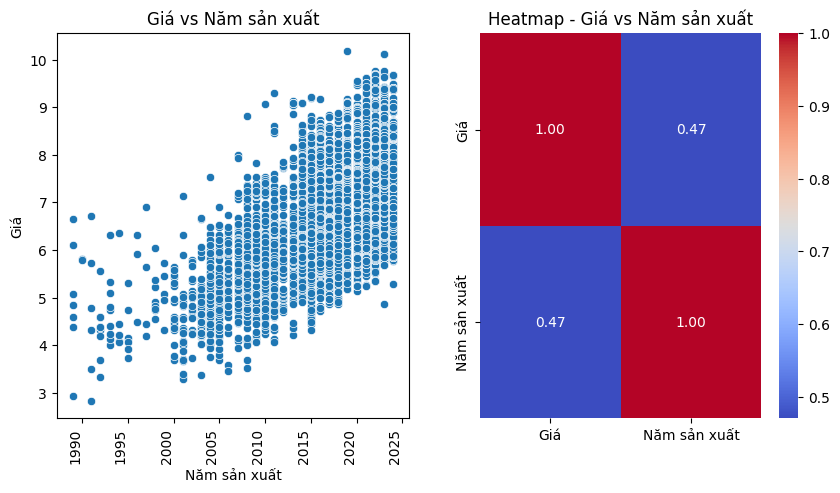

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2212\2148396033.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')


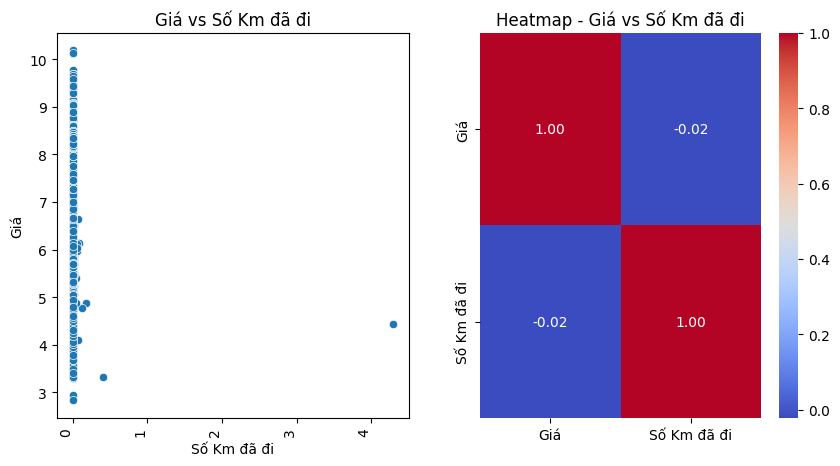

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2212\2148396033.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')


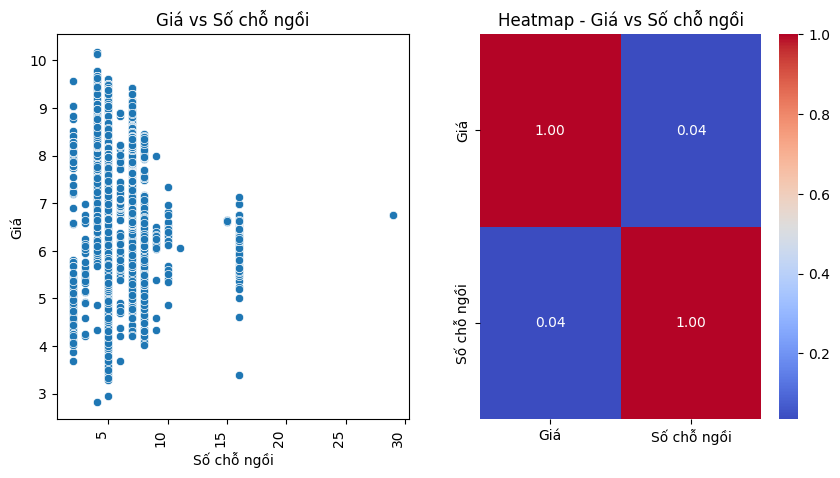

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2212\2148396033.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')


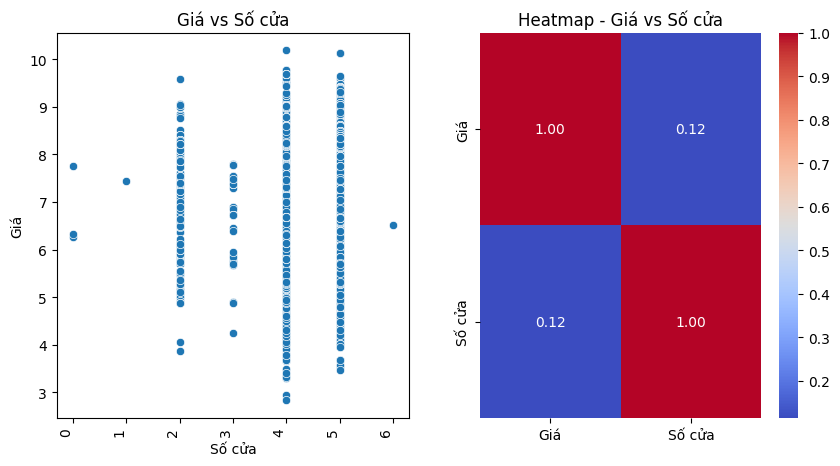

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2212\2148396033.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')


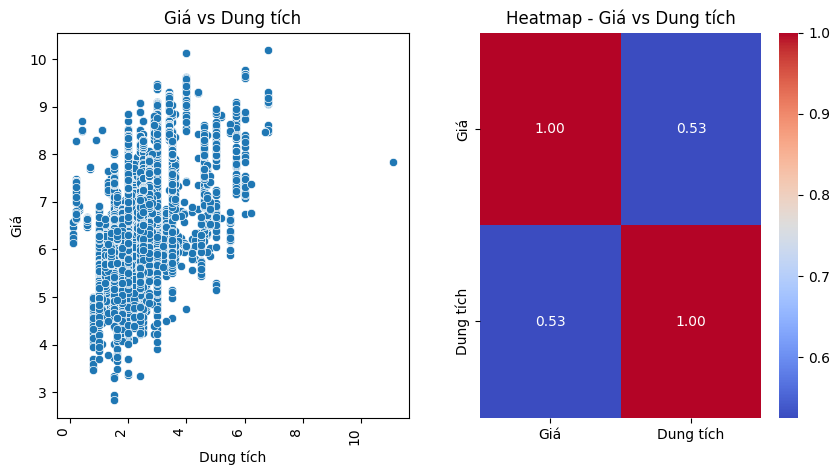

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2212\2148396033.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')


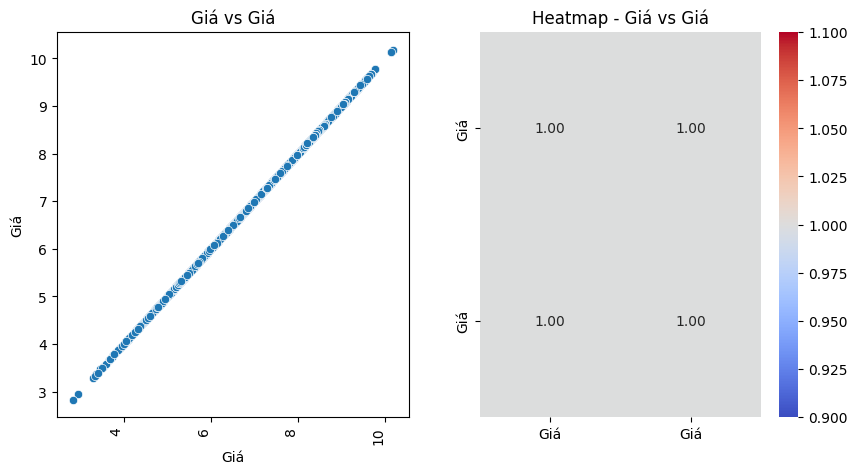

In [21]:
# Lựa chọn các cột số
cột_số = df.select_dtypes(include=[np.number]).columns

for cột in cột_số:
    # Tạo subplot
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Biểu đồ phân tán sử dụng seaborn
    sns.scatterplot(x=df[cột], y=df['Giá'], ax=axes[0])
    axes[0].set_xlabel(cột)
    axes[0].set_ylabel('Giá')
    axes[0].set_title('Giá vs ' + cột)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

    # Heatmap sử dụng seaborn
    sns.heatmap(df[['Giá', cột]].corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1])

    # Đặt tiêu đề của biểu đồ
    plt.title("Heatmap - Giá vs " + cột)

    # Hiển thị biểu đồ
    plt.show()



### Giá vs Năm sản xuất
- Có mối tương quan tích cực giữa giá và năm sản xuất, với giá xe tăng theo thời gian.

### Giá vs Số Km đã đi
- Không có mối tương quan rõ ràng giữa giá xe và số km đã đi.

### Giá vs Số chỗ ngồi
- Mối tương quan giữa giá và số chỗ ngồi là rất yếu, cho thấy số chỗ ngồi không phải là yếu tố chính ảnh hưởng đến giá xe.

### Giá vs Số cửa
- Mối tương quan yếu giữa giá và số cửa, chỉ ra rằng số cửa không phải là yếu tố quan trọng ảnh hưởng đến giá xe.

### Giá vs Dung tích
- Có mối tương quan tích cực mạnh giữa giá và dung tích, cho thấy xe có dung tích lớn hơn thường có giá cao hơn.

### Giá vs Giá
- Biểu đồ và heatmap này thể hiện sự so sánh trực tiếp giữa giá và chính nó, tự nhiên cho thấy mối tương quan tuyệt đối.


In [22]:
# Lựa chọn các cột số
cột_số = df.select_dtypes(include=[np.number]).columns
for cột in cột_số:
    correlation, p_value = pearsonr(df['Giá'], df[cột])
    print("Tương quan với 'Giá' cho cột '{}' : {:.4f}".format(cột, correlation))
    print("Giá trị p cho cột '{}' : {:.4f}".format(cột, p_value))
    print("------------------------------------------------------")


Tương quan với 'Giá' cho cột 'Năm sản xuất' : 0.4705
Giá trị p cho cột 'Năm sản xuất' : 0.0000
------------------------------------------------------
Tương quan với 'Giá' cho cột 'Số Km đã đi' : -0.0217
Giá trị p cho cột 'Số Km đã đi' : 0.0005
------------------------------------------------------
Tương quan với 'Giá' cho cột 'Số chỗ ngồi' : 0.0354
Giá trị p cho cột 'Số chỗ ngồi' : 0.0000
------------------------------------------------------
Tương quan với 'Giá' cho cột 'Số cửa' : 0.1153
Giá trị p cho cột 'Số cửa' : 0.0000
------------------------------------------------------
Tương quan với 'Giá' cho cột 'Dung tích' : 0.5251
Giá trị p cho cột 'Dung tích' : 0.0000
------------------------------------------------------
Tương quan với 'Giá' cho cột 'Giá' : 1.0000
Giá trị p cho cột 'Giá' : 0.0000
------------------------------------------------------


# Phân tích Tương Quan và P-value

## Kết quả

Dưới đây là tóm tắt về hệ số tương quan và giá trị p-value giữa giá xe và các thuộc tính khác:

- **Năm sản xuất**:
  - Tương quan: 0.4705
  - P-value: 0.0000
  - **Nhận xét**: Tương quan mạnh và có ý nghĩa thống kê, cho thấy giá xe có xu hướng tăng khi năm sản xuất gần đây hơn.

- **Số Km đã đi**:
  - Tương quan: -0.0217
  - P-value: 0.0005
  - **Nhận xét**: Tương quan rất yếu và có thể không quan trọng, nhưng p-value nhỏ cho thấy rằng mối quan hệ này có thể có ý nghĩa thống kê trong một bối cảnh rộng hơn.

- **Số chỗ ngồi**:
  - Tương quan: 0.0354
  - P-value: 0.0000
  - **Nhận xét**: Mặc dù tương quan rất yếu, p-value nhỏ cho thấy mối quan hệ này có thể có ý nghĩa thống kê, cần xem xét kỹ lưỡng hơn trong bối cảnh của các yếu tố khác.

- **Số cửa**:
  - Tương quan: 0.1153
  - P-value: 0.0000
  - **Nhận xét**: Tương quan yếu nhưng có ý nghĩa thống kê, cho thấy số cửa có thể có ảnh hưởng nhỏ đến giá xe.

- **Dung tích**:
  - Tương quan: 0.5251
  - P-value: 0.0000
  - **Nhận xét**: Tương quan mạnh và có ý nghĩa thống kê rất cao, dung tích lớn hơn thường liên quan đến giá xe cao hơn.

## Kết Luận

Các kết quả cho thấy rằng "Năm sản xuất" và "Dung tích" là những yếu tố có tương quan mạnh mẽ và có ý nghĩa thống kê với giá xe. Điều này nên được cân nhắc khi xây dựng các mô hình dự đoán giá xe. Trong khi đó, các yếu tố như "Số Km đã đi" và "Số chỗ ngồi", mặc dù có p-value nhỏ, nhưng có hệ số tương quan rất yếu, cho thấy ảnh hưởng của chúng có thể không đáng kể hoặc cần được điều chỉnh bởi các yếu tố khác trong mô hình.


### Phân tích bi_variate cho cột giá và các cột phân loại

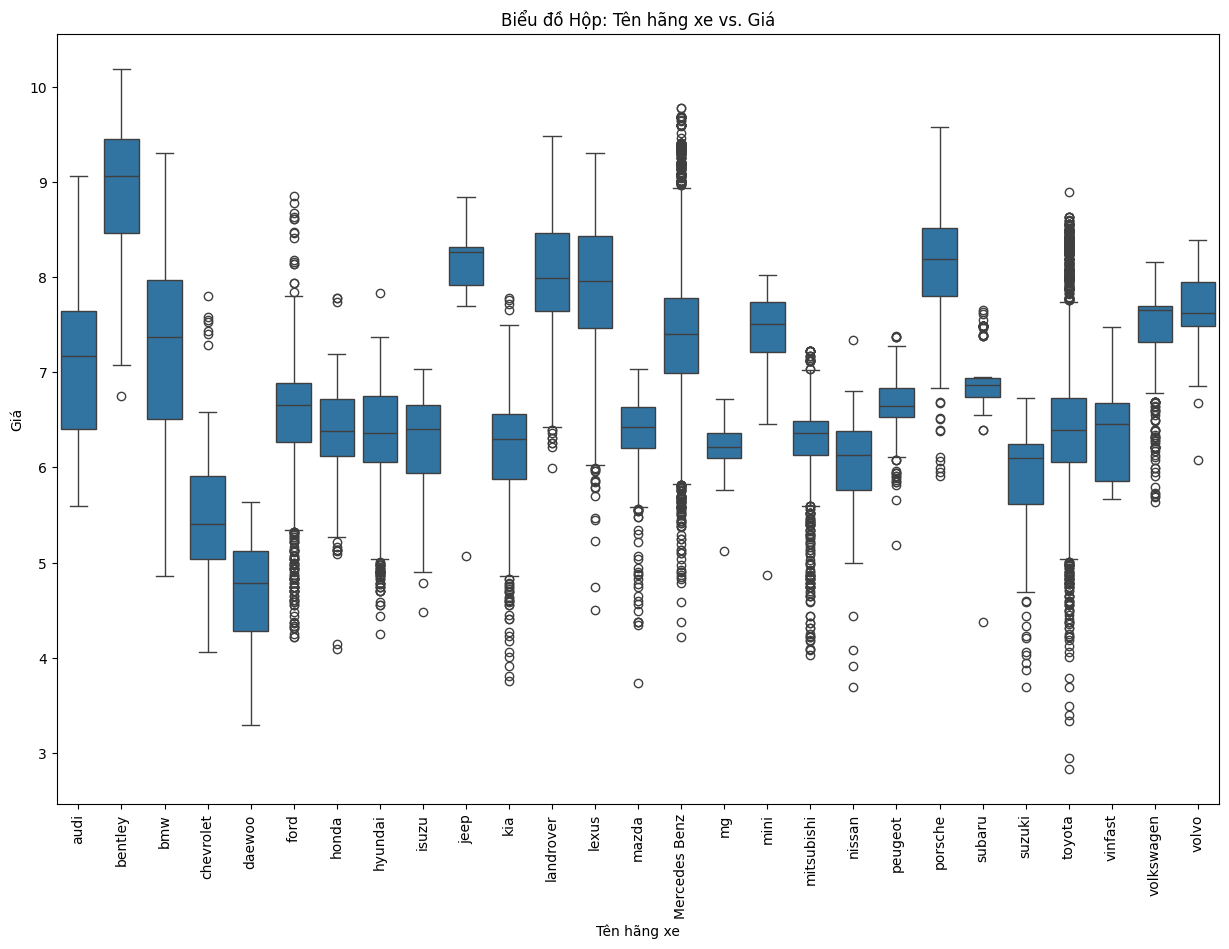

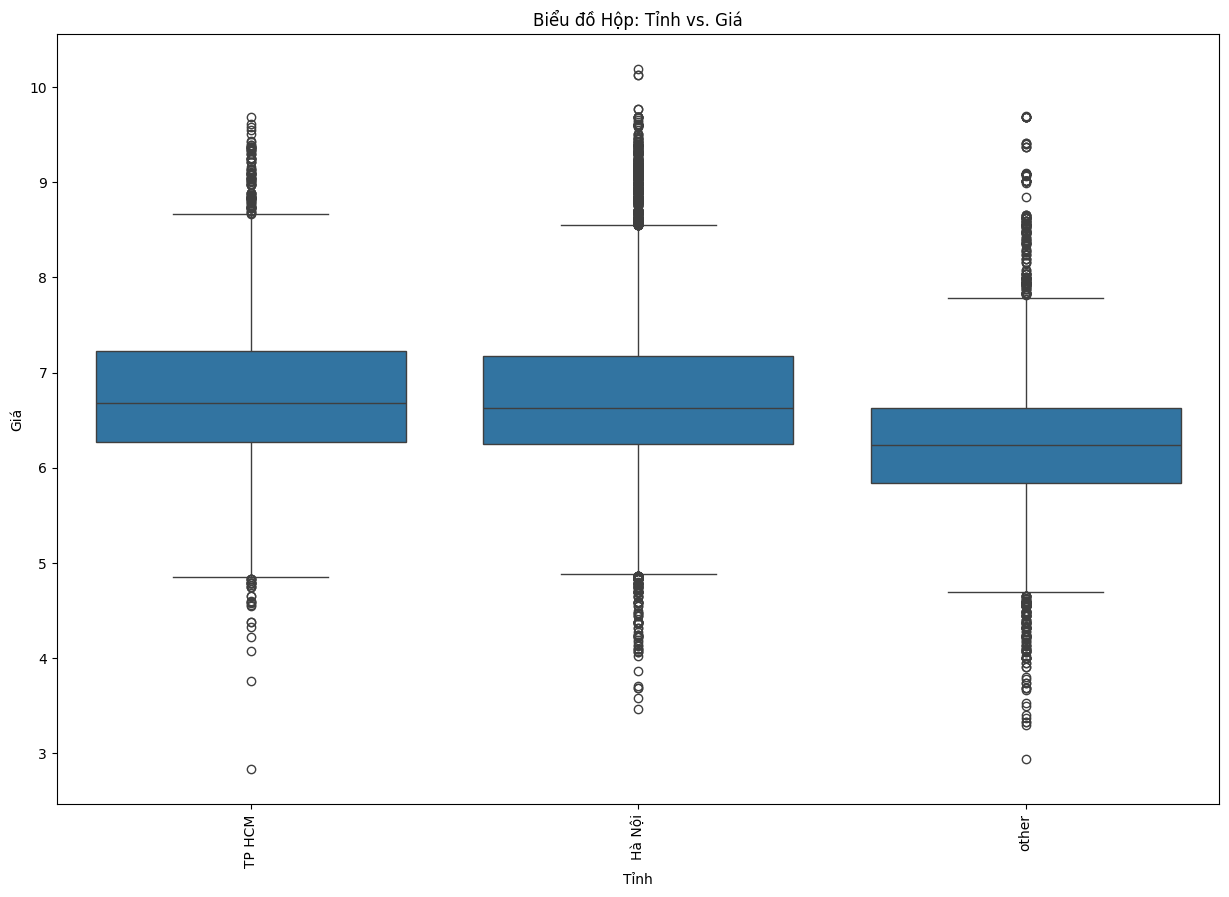

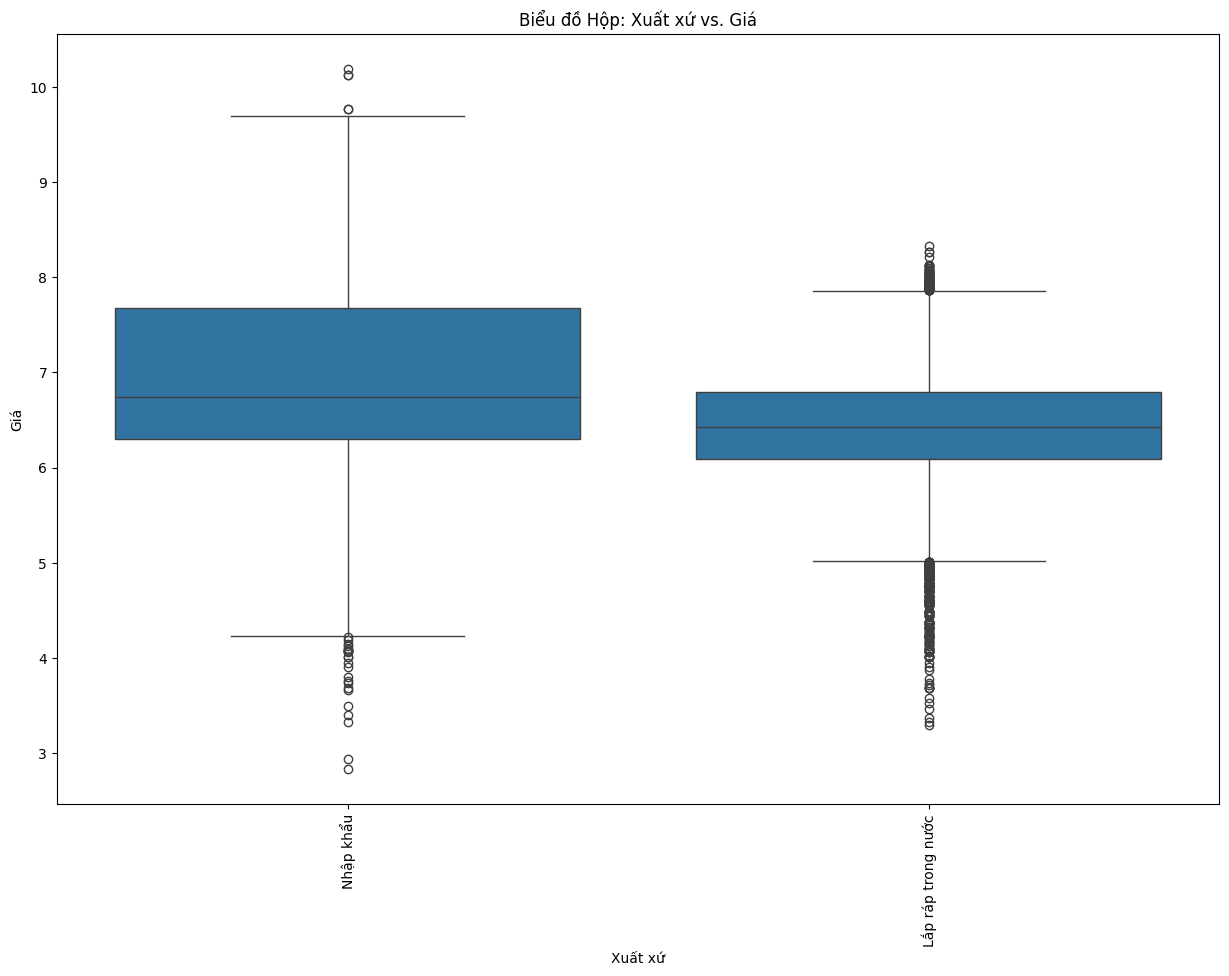

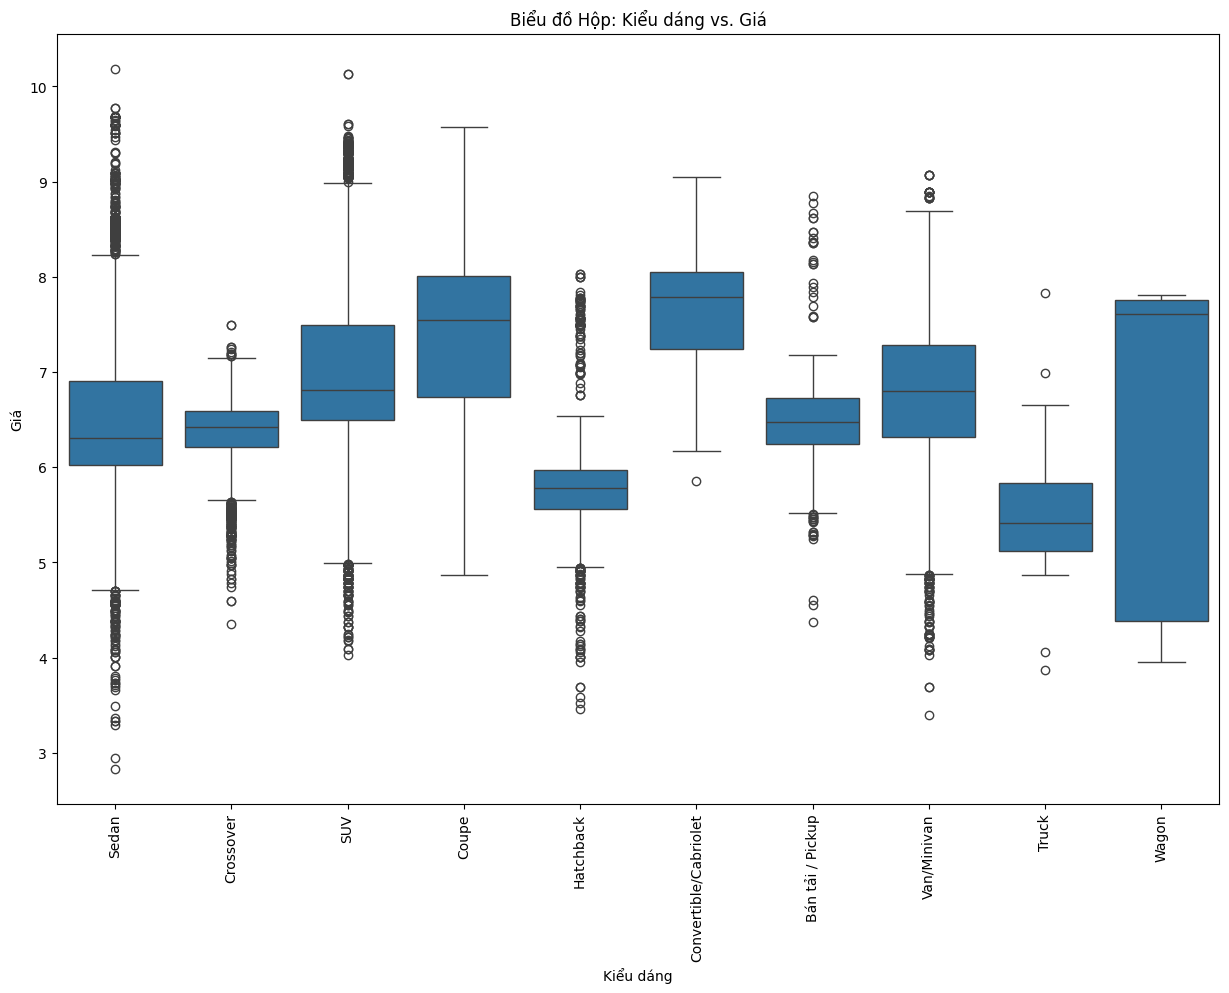

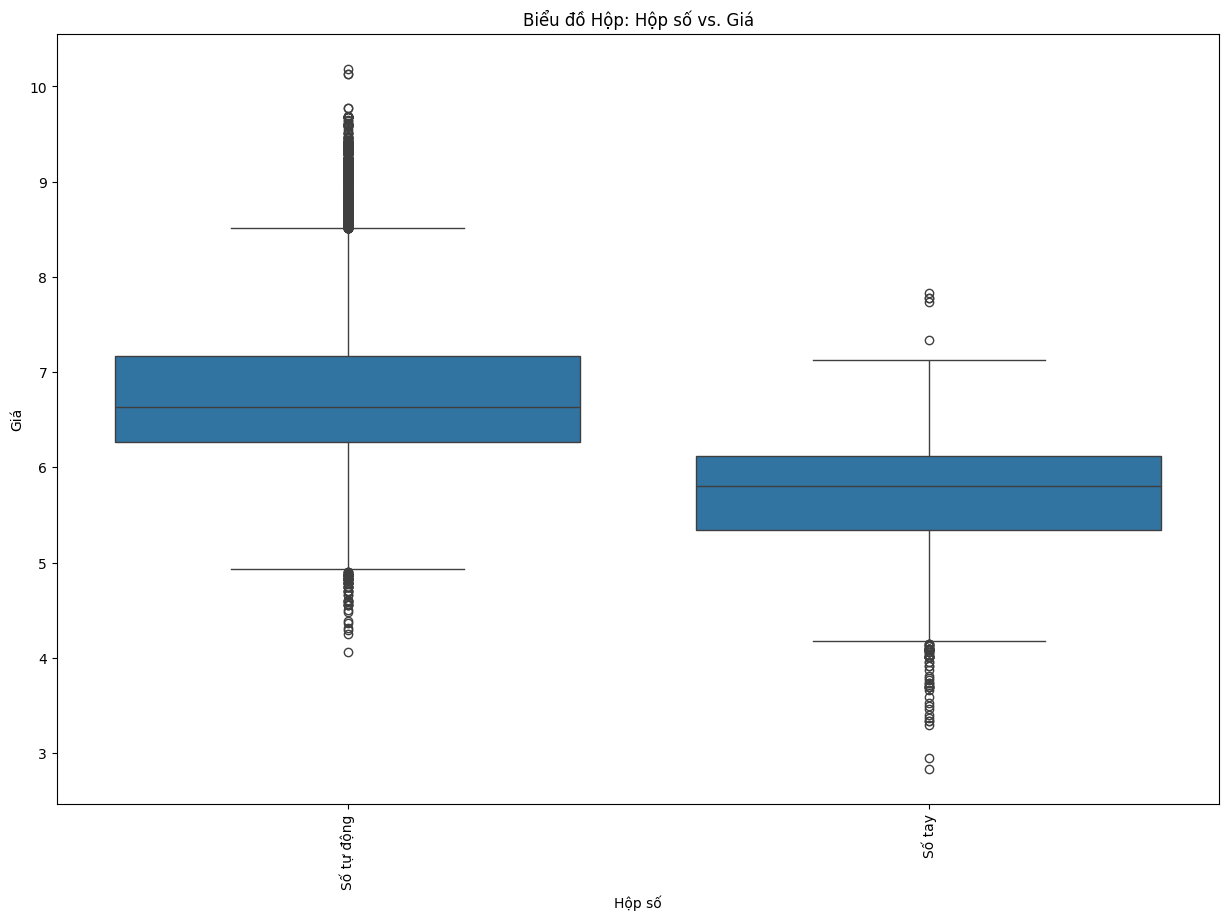

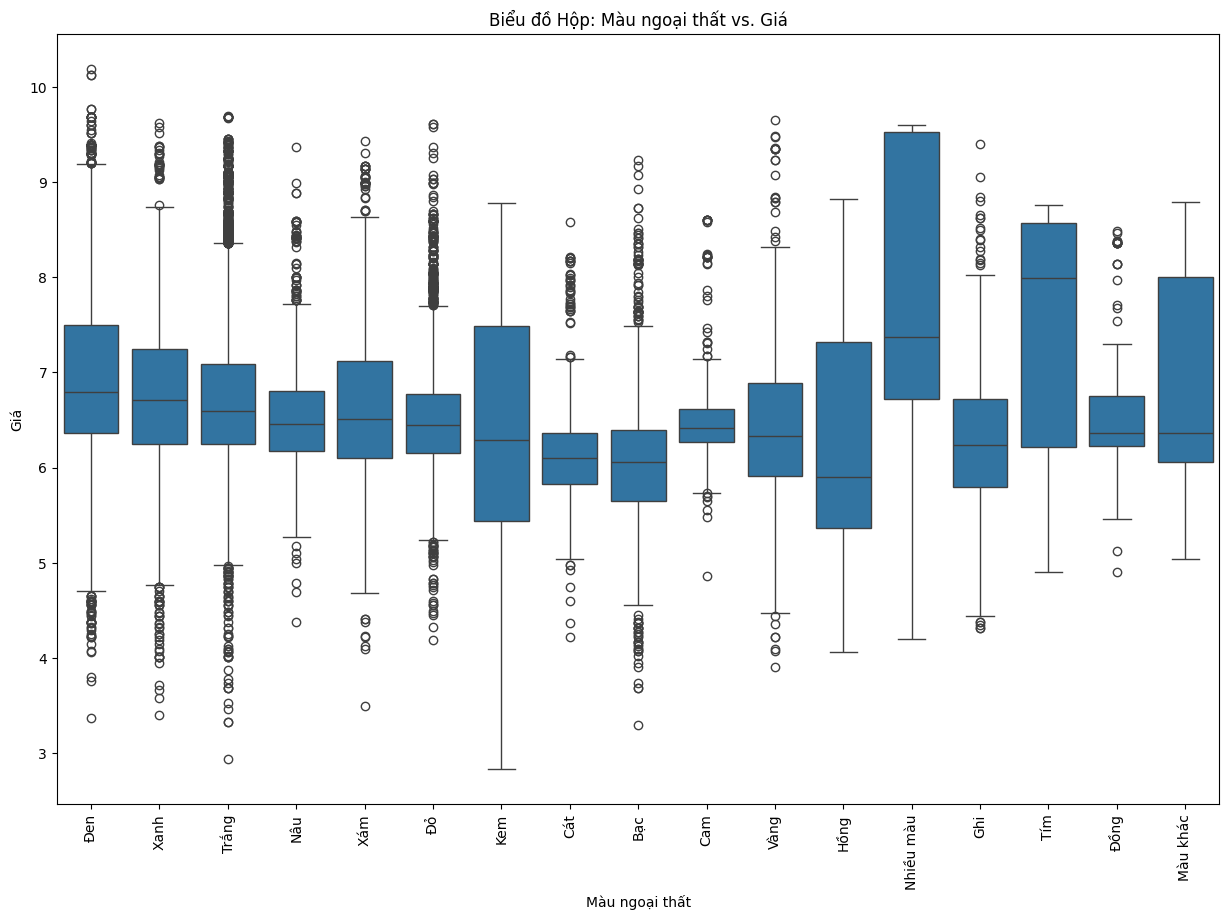

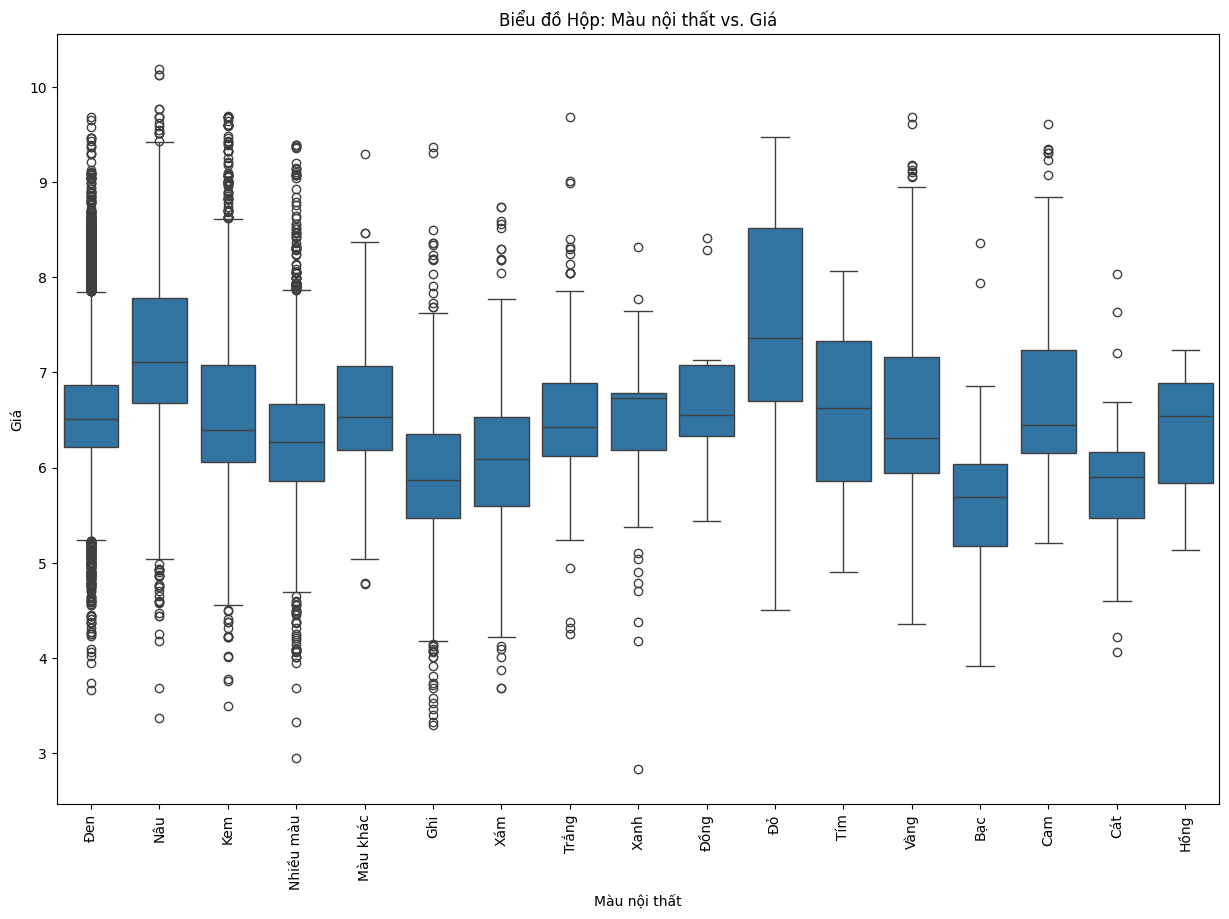

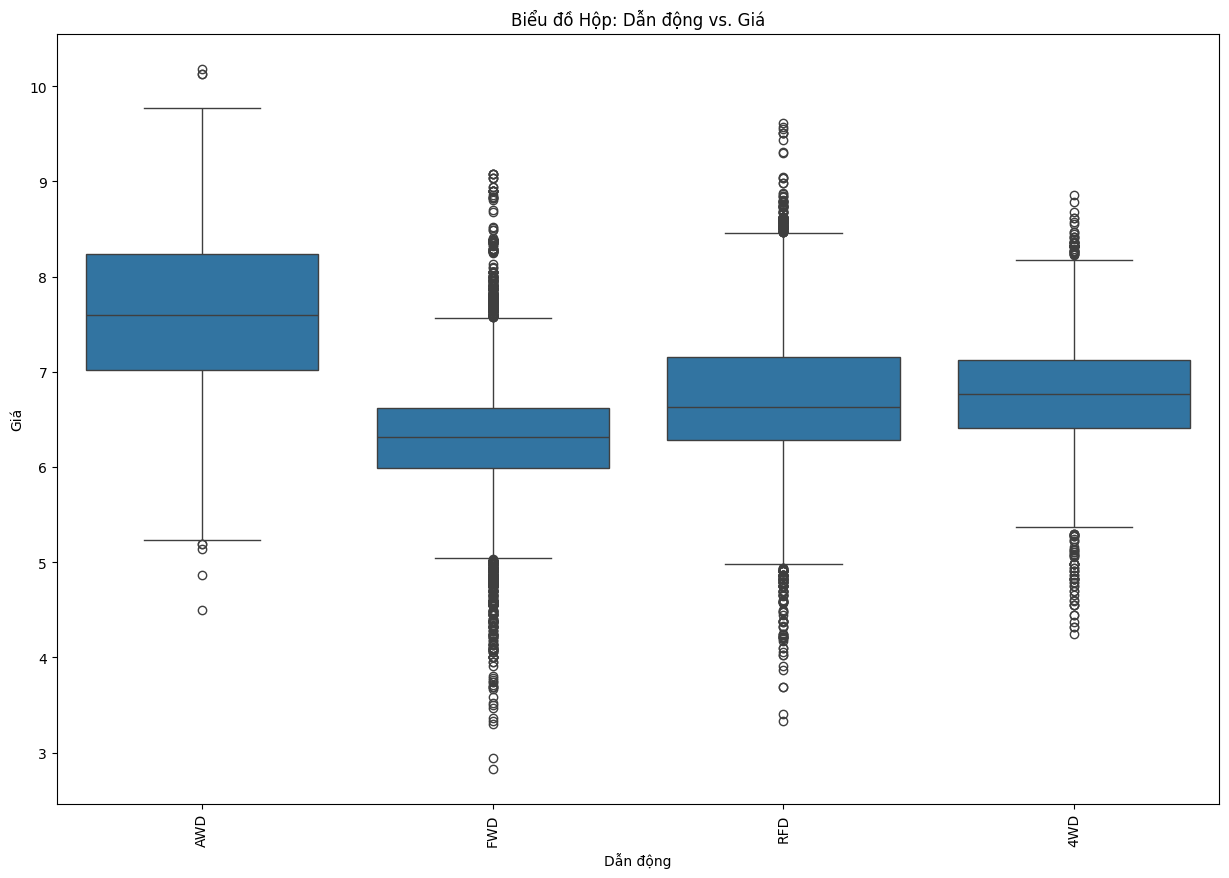

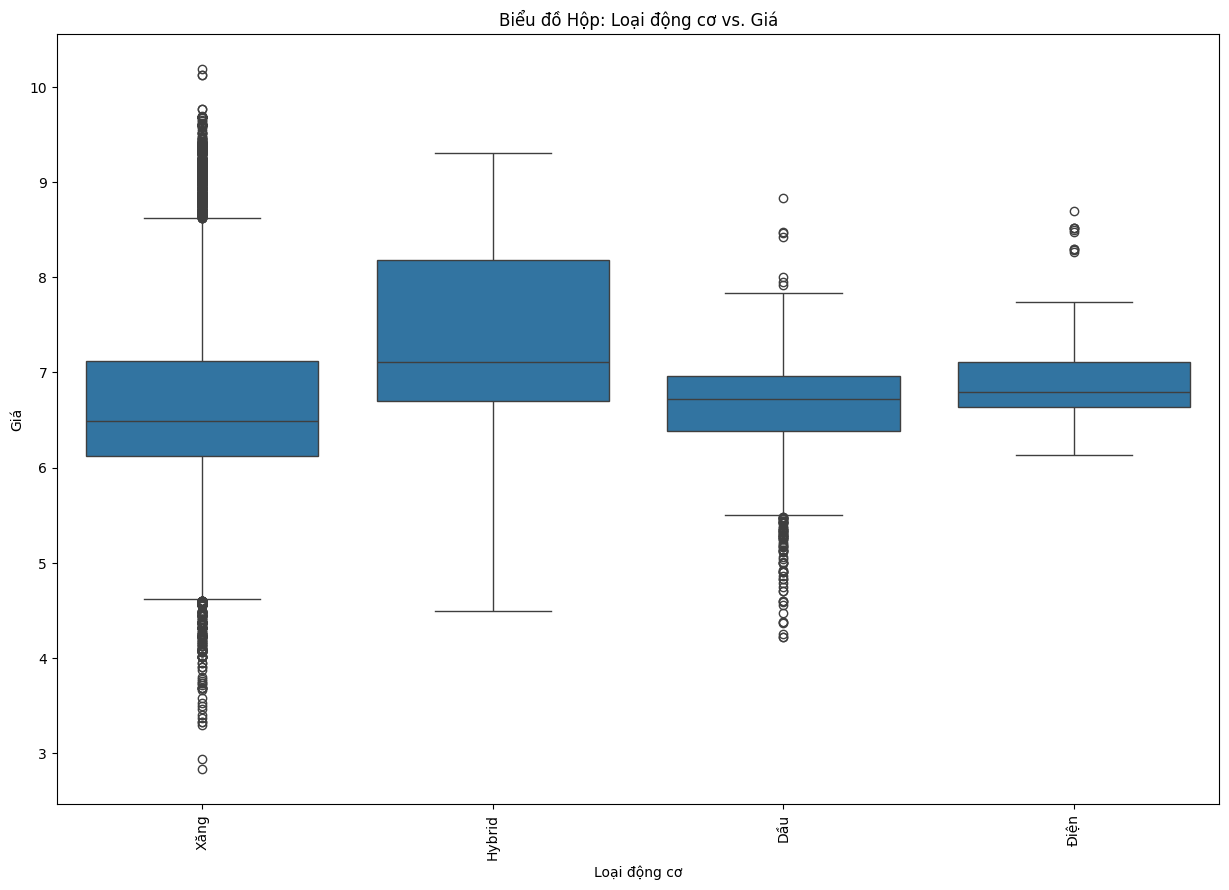

In [23]:
categorical_column = []
for cột in df.columns:
    if df[cột].dtype == object:
        categorical_column.append(cột)
        
# Duyệt qua từng cột phân loại
for cột in categorical_column:
    plt.figure(figsize=(15, 10))
    
    # Tạo biểu đồ hộp
    sns.boxplot(data=df, x=cột, y='Giá')
    
    # Đặt nhãn và tiêu đề
    plt.xlabel(cột)
    plt.ylabel('Giá')
    plt.title(f'Biểu đồ Hộp: {cột} vs. Giá')
    
    # Xoay nhãn trục x để hiển thị rõ ràng hơn
    plt.xticks(rotation=90)
    
    # Hiển thị biểu đồ
    plt.show()


### Giá xe theo tên hãng
- Biểu đồ cho thấy sự khác biệt về phạm vi giá giữa các hãng, với một số hãng như Audi và BMW có giá trung bình cao hơn.

### Giá xe theo tỉnh
- Có sự biến động giá xe lớn giữa các tỉnh, với một số tỉnh như Hà Nội và TP.HCM có phạm vi giá rộng hơn.

### Giá xe theo tình trạng
- Xe mới và xe cũ có phân bố giá khác nhau, xe mới có giá cao hơn đáng kể so với xe cũ.

### Giá xe theo xuất xứ
- Xe nhập khẩu có giá trung bình cao hơn xe lắp ráp trong nước.

### Giá xe theo kiểu dáng
- SUV và Sedan là những kiểu dáng có giá trung bình cao, trong khi các kiểu dáng như Hatchback có giá thấp hơn.

### Giá xe theo hộp số
- Xe sử dụng hộp số tự động có giá cao hơn xe sử dụng hộp số sàn.

### Giá xe theo màu ngoại thất
- Màu sắc ngoại thất có ảnh hưởng nhất định đến giá xe, với một số màu như trắng và đen có giá trung bình cao hơn.

### Giá xe theo màu nội thất
- Tương tự như màu ngoại thất, màu nội thất cũng cho thấy sự khác biệt về giá.

### Giá xe theo dẫn động
- Xe dẫn động cầu trước có giá thấp hơn so với xe dẫn động toàn phần.

### Giá xe theo loại động cơ
- Xe sử dụng động cơ xăng có giá thấp hơn so với xe sử dụng động cơ diesel hoặc hybrid.


In [24]:
from scipy.stats import f_oneway
import pandas as pd

# Giả sử bạn có một DataFrame tên là 'df' chứa dữ liệu
# và 'categorical_column' là một danh sách các cột phân loại
categorical_column = []
for cột in df.columns:
    if df[cột].dtype == object:
        categorical_column.append(cột)

for cột in categorical_column:
    # Loại bỏ bất kỳ hàng nào có giá trị thiếu
    dữ_liệu = df[['Giá', cột]].copy()
    dữ_liệu.dropna(inplace=True)

    # Thực hiện ANOVA
    nhóm = [dữ_liệu[dữ_liệu[cột] == giá_trị]['Giá'] for giá_trị in dữ_liệu[cột].unique()]
    f_statistic, p_value = f_oneway(*nhóm)

    # Tạo DataFrame để hiển thị kết quả
    kết_quả = pd.DataFrame({'Nhóm': dữ_liệu[cột].unique(), 'F-Statistic': f_statistic, 'Giá trị p': p_value})
    
    # In bảng ANOVA
    print(f"Kiểm định ANOVA cho {cột}")
    print(kết_quả.head())
    print("---------------------------")



Kiểm định ANOVA cho Tên hãng xe
        Nhóm  F-Statistic  Giá trị p
0       audi   823.333449        0.0
1    bentley   823.333449        0.0
2        bmw   823.333449        0.0
3  chevrolet   823.333449        0.0
4     daewoo   823.333449        0.0
---------------------------
Kiểm định ANOVA cho Tỉnh
     Nhóm  F-Statistic  Giá trị p
0  TP HCM   866.603723        0.0
1  Hà Nội   866.603723        0.0
2   other   866.603723        0.0
---------------------------
Kiểm định ANOVA cho Xuất xứ
                 Nhóm  F-Statistic  Giá trị p
0           Nhập khẩu  2907.128434        0.0
1  Lắp ráp trong nước  2907.128434        0.0
---------------------------
Kiểm định ANOVA cho Kiểu dáng
        Nhóm  F-Statistic  Giá trị p
0      Sedan   597.806497        0.0
1  Crossover   597.806497        0.0
2        SUV   597.806497        0.0
3      Coupe   597.806497        0.0
4  Hatchback   597.806497        0.0
---------------------------
Kiểm định ANOVA cho Hộp số
         Nhóm  F-Statistic  

# Phân tích ANOVA

Phân tích ANOVA được thực hiện cho các nhóm khác nhau nhằm kiểm tra sự khác biệt đáng kể về giá giữa các nhóm.

## Kết quả ANOVA

### Tên hãng xe
- **Các hãng xe** (Audi, Bentley, BMW, Chevrolet, Daewoo, ...)
  - F-Statistic: 823.333449 cho mỗi hãng
  - p-value: 0.0
  - **Nhận xét**: Có sự khác biệt đáng kể về giá giữa các hãng xe, điều này cho thấy hãng xe là một yếu tố quan trọng ảnh hưởng đến giá.

### Tỉnh
- **Các tỉnh** (TP HCM, Hà Nội, Nam Định, Bến Tre, Đà Nẵng, ...)
  - F-Statistic: 43.589823 cho mỗi tỉnh
  - p-value: 0.0
  - **Nhận xét**: Có sự khác biệt đáng kể về giá giữa các tỉnh, có thể do sự chênh lệch về thu nhập, nhu cầu, và thuế.

### Tình trạng
- **Tình trạng xe** (Cũ, Mới)
  - F-Statistic: 1512.927368
  - p-value: 1.393265e-321
  - **Nhận xét**: Có sự khác biệt rất lớn về giá giữa xe cũ và xe mới, cho thấy tình trạng xe là yếu tố cực kỳ quan trọng trong việc xác định giá.

### Xuất xứ
- **Xuất xứ** (Nhập khẩu, Lắp ráp trong nước)
  - F-Statistic: 2907.128434
  - p-value: 0.0
  - **Nhận xét**: Có sự khác biệt đáng kể về giá giữa xe nhập khẩu và xe lắp ráp trong nước, điều này cho thấy xuất xứ là một yếu tố quan trọng trong việc định giá xe.

### Nhiên liệu
- **Loại nhiên liệu** (Hybrid, Dầu, Xăng, ...)
  - F-Statistic: 90.606534 cho mỗi loại
  - p-value: 2.540603e-58
  - **Nhận xét**: Có sự khác biệt đáng kể về giá giữa các loại nhiên liệu, cho thấy loại nhiên liệu cũng là yếu tố ảnh hưởng đến giá xe.

## Tổng Kết

Kết quả ANOVA cho thấy có sự khác biệt đáng kể về giá giữa các nhóm xe dựa trên hãng, tỉnh, tình trạng, xuất xứ, và loại nhiên liệu. Những phát hiện này rất quan trọng cho việc phân tích thêm về cách thức các yếu tố này ảnh hưởng đến giá xe và có thể được sử dụng để xây dựng các mô hình dự đoán giá xe chính xác hơn.


#### Kiểm tra thống kê

In [25]:
cột_cat = []
for cột in df.columns:
    if df[cột].dtype == object:
        cột_cat.append(cột)
        
# Tạo một từ điển rỗng để lưu kết quả kiểm định chi-square
kết_quả_chi_square = {}

# Bảng và Kiểm định chi-square
for i in range(len(cột_cat)):
    for j in range(i + 1, len(cột_cat)):
        # Tạo bảng tần số
        tab = pd.crosstab(df[cột_cat[i]], df[cột_cat[j]])
        
        # Thực hiện kiểm định chi-square về sự độc lập
        chi2, p_value, dof, expected = stats.chi2_contingency(tab)
        
        # Lưu kết quả vào từ điển
        kết_quả_chi_square[(cột_cat[i], cột_cat[j])] = {'Chi-Square': chi2, 'Giá trị p': p_value}

# In kết quả Kiểm định chi-square
for cặp, kết_quả in kết_quả_chi_square.items():
    print(f"Kiểm định Chi-Square về Sự độc lập cho {cặp}:")
    print(f"Thống kê Chi-Square: {kết_quả['Chi-Square']}")
    print(f"Giá trị p: {kết_quả['Giá trị p']}")
    print("--------------------------------------------------")


Kiểm định Chi-Square về Sự độc lập cho ('Tên hãng xe', 'Tỉnh'):
Thống kê Chi-Square: 2087.0200889630823
Giá trị p: 0.0
--------------------------------------------------
Kiểm định Chi-Square về Sự độc lập cho ('Tên hãng xe', 'Xuất xứ'):
Thống kê Chi-Square: 9082.242715391476
Giá trị p: 0.0
--------------------------------------------------
Kiểm định Chi-Square về Sự độc lập cho ('Tên hãng xe', 'Kiểu dáng'):
Thống kê Chi-Square: 23157.060425989992
Giá trị p: 0.0
--------------------------------------------------
Kiểm định Chi-Square về Sự độc lập cho ('Tên hãng xe', 'Hộp số'):
Thống kê Chi-Square: 2915.6298998052475
Giá trị p: 0.0
--------------------------------------------------
Kiểm định Chi-Square về Sự độc lập cho ('Tên hãng xe', 'Màu ngoại thất'):
Thống kê Chi-Square: 6926.341037576142
Giá trị p: 0.0
--------------------------------------------------
Kiểm định Chi-Square về Sự độc lập cho ('Tên hãng xe', 'Màu nội thất'):
Thống kê Chi-Square: 10330.104228784912
Giá trị p: 0.0
-----

# Phân tích Chi-Square

## Kết quả

Các bài kiểm định Chi-Square đã được thực hiện để xác định mối quan hệ độc lập giữa "Tên hãng xe" và các thuộc tính khác như "Tỉnh", "Tình trạng", "Xuất xứ", v.v. Dưới đây là kết quả chi tiết:

### Tên hãng xe và Tỉnh
- **Chi-Square Statistic**: 7274.63555580069
- **P-Value**: 0.0
- **Nhận xét**: Có sự phụ thuộc mạnh mẽ giữa hãng xe và tỉnh, có thể do sự phân bố khác nhau của các hãng xe ở các tỉnh khác nhau.

### Tên hãng xe và Tình trạng
- **Chi-Square Statistic**: 2660.2349696147257
- **P-Value**: 0.0
- **Nhận xét**: Có sự phụ thuộc giữa hãng xe và tình trạng của xe (mới hoặc cũ), điều này có thể liên quan đến chính sách bán hàng hoặc ưu đãi của các hãng.

### Tên hãng xe và Xuất xứ
- **Chi-Square Statistic**: 9082.242715391476
- **P-Value**: 0.0
- **Nhận xét**: Có sự phụ thuộc rất mạnh mẽ giữa hãng xe và xuất xứ của xe, phản ánh xu hướng nhập khẩu hoặc lắp ráp của các hãng khác nhau.

### Tên hãng xe và Kiểu dáng
- **Chi-Square Statistic**: 23157.060425989992
- **P-Value**: 0.0
- **Nhận xét**: Sự phụ thuộc mạnh mẽ giữa hãng xe và kiểu dáng của xe, cho thấy mỗi hãng có những mẫu xe đặc trưng riêng biệt.

### Tên hãng xe và Hộp số
- **Chi-Square Statistic**: 2915.629989052475
- **P-Value**: 0.0
- **Nhận xét**: Có sự phụ thuộc giữa hãng xe và loại hộp số, có thể do các công nghệ và tiêu chuẩn thiết kế khác nhau giữa các hãng.

### Tên hãng xe và Màu ngoại thất
- **Chi-Square Statistic**: 6926.341037576141
- **P-Value**: 0.0
- **Nhận xét**: Có mối quan hệ phụ thuộc giữa hãng xe và màu ngoại thất, có thể do các hãng có xu hướng ưu tiên sản xuất màu sắc phổ biến nhất ở các thị trường cụ thể.

### Động cơ và Loại động cơ
- **Chi-Square Statistic**: 6557.902452579049
- **P-Value**: 0.0
- **Nhận xét**: Mối quan hệ phụ thuộc mạnh mẽ giữa động cơ và loại động cơ, phản ánh các loại động cơ đặc trưng cho từng hãng xe.

## Tổng Kết

Các kết quả kiểm định Chi-Square cho thấy không có sự độc lập giữa "Tên hãng xe" và hầu hết các thuộc tính khác được xem xét. Sự phụ thuộc mạnh mẽ này cung cấp thông tin quan trọng về cách thức các yếu tố như tỉnh, tình trạng xe, xuất xứ, kiểu dáng, hộp số, và màu ngoại thất có thể liên quan đến các hãng xe cụ thể. Những phát hiện này có thể hữu ích cho việc phân tích thị trường và chiến lược sản phẩm của các hãng xe.
